# Prédisez la consommation d'énergie des bâtiments dans la ville de Seattle.

<div align="left">
  <img src="https://user.oc-static.com/upload/2024/09/11/17260684381511_Capture%20d%E2%80%99e%CC%81cran%202024-09-11%20a%CC%80%2017.22.25.png" width="200px">
</div>

## **Objetif**: Prédire les **émissions de CO2** et la **consommation totale d’énergie** de **bâtiments non destinés à l’habitation**

- Auteur......: **Rafael CEREZO MARTIN**
- Date........: **Décembre 2025**

# <span style="color:red">PART 4. Modélisation avec CUSTOM Pipeline. Sur Dataset Clean V2</span>

# Objetives

A réaliser :

- ✅️ (EDA 1.1) Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
- Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
- ✅️ (EDA 1.4) Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn
- Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
- ✅️ (1.4) Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
- ✅️ (EDA 5) Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder


### **Étape 3 : Préparez les features pour la modélisation**

📋 **Prérequis**

- **Étape précédente :** Avoir complété l’étape 2 (Analyse Exploratoire).
- **État des données :** Disposer d'un dataset dont la Target a été clairement identifiée et dont les valeurs manquantes majeures ont été traitées.

🎯 **Résultat attendu**

- **Le notebook template** avec la partie “Préparation des features pour la modélisation” entièrement complétée.
- **Capacité de soutenance :** Être capable d'expliquer votre démarche et votre logique. Anticipez les questions sur vos choix de transformations (pourquoi le Log ? pourquoi ce seuil de Winsorisation ?) et préparez vos arguments.

💡 **Recommandations**

- **Gestion des Outliers :** Si la méthode IQR ou Z-score est trop agressive et supprime trop de bâtiments, privilégiez l'utilisation de seuils basés sur les quantiles (ex: 1% et 99%) pour limiter l'impact des valeurs extrêmes sans perdre trop de signal.
- 🚩**Analyse de tendances :** Essayez de dégager des comportements dans vos données (par exemple : "lorsque la feature X dépasse la valeur V, on observe une augmentation exponentielle de la target Y").
- 🚩**Anticipation technique :** Consultez dès maintenant les méthodes importées via Scikit-Learn dans la section modélisation du template. Votre code de préparation doit être compatible avec ces outils.
- ✅️ FE(5.1) **Stratégie d'encodage :** Maîtrisez la distinction entre le OneHotEncoder (variables nominales sans ordre) et le LabelEncoder/OrdinalEncoder (variables avec une hiérarchie logique).

⚠️ **Points de vigilance**

- ✅️ (1.5) **Équilibre du dataset :** Évitez de réduire significativement la taille de votre échantillon en supprimant les valeurs extrêmes. Il faut trouver le juste milieu entre la "pureté" statistique et la représentativité du parc immobilier.
- 🚩**Corrélation :** Gardez en tête que la matrice de corrélation (Pearson) n'est réellement pertinente que pour les relations linéaires entre variables quantitatives.
- 🚩**Explosion de colonnes :** Ne pas utiliser le OneHotEncoder sur une feature qualitative ayant une trop forte cardinalité (trop de modalités). Utilisez l'argument max_categories pour regrouper les catégories minoritaires et éviter le "fléau de la dimension".

📚 **Ressources**

- Le chapitre Transformez les variables pour faciliter l'apprentissage du cours d'initiation au Machine Learning.

### **Étape 4 : Comparaison de différents modèles supervisés**

📋 **Prérequis**

* **Concepts théoriques :** Maîtriser la différence entre le **Train-Test Split** (partage simple) y la **Validation Croisée** (test de robustesse par rotation).
* **Mécanique Scikit-Learn :** Comprendre le cycle de vie d'un modèle : `Instantiation` -> `fit()` (apprentissage) -> `predict()` (inférence).
* **Intuition Statistique :** Savoir interpréter le **R2** (pourcentage de variance expliquée) et le **MAE** (erreur moyenne absolue dans l'unité de la cible).
  
    **1. Le R2 (Coefficient de Détermination)**
    C'est une mesure de la **qualité de la prédiction**. Il répond à la question : "Quelle proportion de la complexité des données mon modèle a-t-il comprise ?"
  
        * **Interprétation :** Si R2 = 0.80 , s'explique: *"Mon modèle capture 80 % de la variance de la consommation énergétique. Les 20 % restants sont dus à des facteurs non observés ou à du bruit aléatoire."*
  
    **2. Le MAE (Mean Absolute Error)**
    C'est l'**erreur moyenne concrète**. Contrairement au , le MAE s'exprime dans la même unité que votre variable cible (par exemple, en kBtu).
  
        * **Interprétation :** Si MAE est de 50,  s'explique : *"En moyenne, mon modèle se trompe de 50 kBtu par rapport à la consommation réelle du bâtiment."* C'est la métrique la plus parlante pour les non-spécialistes.

* **Diagnostic :** Être capable de définir l'**Overfitting** (lorsque le modèle mémorise le bruit au lieu d'apprendre la tendance).

    **La définition de l'Overfitting (Surapprentissage)**
    
    L'**Overfitting**, c'est quand votre modèle devient "trop intelligent pour son propre bien". Au lieu de comprendre la logique générale (la tendance), il apprend par cœur les spécificités et les erreurs de mesure (le bruit) de votre jeu d'entraînement.
    
    **Comment le détecter dans votre projet ?**
    
    Pour prouver au jury que vous maîtrisez ce concept, vous devez montrer la comparaison entre vos scores :
    
    1. **Le signe révélateur :** Si votre  est de **0.98** sur le jeu d'entraînement, mais qu'il chute à **0.65** lors de la Validation Croisée (Cross-Validation).
    2. **La preuve par la Cross-Validation :** C'est précisément pour cela que le énoncé demande d'utiliser `cross_validate`. En testant le modèle sur des morceaux de données qu'il n'a jamais vus, on mesure sa capacité de **généralisation**.
    
    **Pourquoi est-ce un problème pour Seattle ?**
    
    Si le modèle fait de l'overfitting, il sera excellent pour prédire la consommation des bâtiments que vous avez déjà dans votre fichier, mais il donnera des prédictions totalement fausses pour un nouveau bâtiment qui vient d'être construit.


🎯 **Résultat attendu**

* **Le notebook template :** La section “Comparaison de différents modèles supervisés” doit être finalisée avec une approche comparative rigoureuse.
* **Refactoring :** Un code propre utilisant une fonction unique pour évaluer chaque modèle, garantissant l'équité des tests.

💡 **Recommandations**

* **Standard d'évaluation :** Privilégiez l'utilisation de `cross_validate`. Cela permet d'obtenir une estimation plus fiable de la performance réelle qu'un simple score sur un seul jeu de test.
* **Hiérarchie de complexité :** Commencez systématiquement par la **Régression Linéaire**. C'est votre modèle de référence (baseline). Si un modèle complexe ne fait pas mieux, restez sur la simplicité.
* **Reproductibilité :** Fixez systématiquement le `random_state`. En IA, la science commence par des résultats que l'on peut reproduire.
* **Sobriété technique :** Ne modifiez pas encore los hiperparámetros. Utilisez les réglages par défaut de chaque algorithme para comparer leur potentiel "brut".

⚠️ **Points de vigilance**

* **Comparaison Équitable :** Ne comparez pas "des choux et des carottes". Chaque modèle doit être testé sur le **même nombre de lignes**, les **mêmes variables** et avec les **mêmes métriques**.
* **Scaling :** Rappelez-vous que certains modèles (comme le SVR) sont extrêmement sensibles à l'échelle des données, contrairement aux modèles d'arbres (Random Forest).
* **Signification des métriques :** Un  élevé est satisfaisant, mais vérifiez toujours si le **MAE** est acceptable d'un point de vue métier (ex: "Est-ce grave de se tromper de 200 kWh ?").

📚 **Ressources**

* **Documentation :** [Scikit-learn cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* **Cours :** *Augmentez la robustesse de vos modèles* (Chapitre sur la validation croisée).
* **Lecture :** *L'importance du Random State* pour la cohérence des expérimentations.


### **Étape 5 : Optimisation et Interprétation du Modèle**

📋 **Prérequis**

* **Étape précédente :** Avoir terminé l’étape 4 et identifié le meilleur modèle candidat (ex: le Random Forest).
* **Maîtrise de l'Hyper-paramétrage :** Comprendre qu'un modèle a des "boutons de réglage" (hyperparamètres) qui ne sont pas appris par les données mais fixés par l'humain.

    **1. DummyRegressor**
    
    C'est le modèle le plus simple, il n'a quasiment pas d'hyperparamètres de performance, mais un choix de **stratégie**.
    
    * **`strategy` :** Définit quelle valeur prédire.
    * `"mean"` (la moyenne) : Le plus classique.
    * `"median"` (la médiane) : Plus robuste si vous avez des valeurs extrêmes (outliers).
    
    **Note :** On ne fait pas de GridSearch sur ce modèle, il sert uniquement de point de comparaison.
        
    
    **2. LinearRegression**
    
    Dans sa version de base (Ordinary Least Squares), ce modèle n'a **pas d'hyperparamètres** majeurs à régler.
    
    - **`fit_intercept` :** `True` ou `False`. Détermine si le modèle doit calculer l'ordonnée à l'origine (le point où la droite coupe l'axe Y).
    
    **Conseil:** La régression linéaire est "rigide". Si ses performances sont mauvaises, changer ces paramètres ne l'aidera pas ; il faudra passer à un modèle non-linéaire ou transformer vos données.
    
    **3. SVR (Support Vector Regressor)**
    
    Ici, les réglages sont **fondamentaux** car ils changent radicalement la forme de la zone de prédiction.
    
    - **`kernel` :** Le plus important. `rbf` (courbe) est le standard, mais il existe `linear` ou `poly`.
    -* **`C` (Régularisation) :** Contrôle la pénalité sur les erreurs.
    - Un grand `C` tente de coller parfaitement aux données (risque d'overfitting).
    
    
    - **`epsilon` () :** Définit la largeur du "tube" à l'intérieur duquel aucune erreur n'est comptée. Plus il est grand, plus le modèle est "souple".
    - **`gamma` :** Définit l'influence d'un seul point d'entraînement.
    
    **4. RandomForestRegressor**
    
    C'est ici que la GridSearch devient vraiment passionnante (et gourmande en calcul).
    
    - **`n_estimators` :** Le nombre d'arbres dans la forêt. Plus il y en a, plus le modèle est stable, mais plus c'est lent.
    - **`max_depth` :** La profondeur maximale de chaque arbre.
        - Si c'est trop profond  **Overfitting**.
        - Si c'est trop court  **Underfitting**.
    
    - **`min_samples_split` :** Le nombre minimum d'échantillons requis pour diviser un nœud. Plus il est élevé, plus l'arbre est "prudent".
    - **`max_features` :** Le nombre de variables à considérer pour chaque division. Souvent `sqrt` (racine carrée) ou `log2`.

### Résumé pour votre GridSearch (Étape 5)

Si on doit choisir un modèle à optimiser en priorité, c'est le **RandomForestRegressor**, car ses hyperparamètres permettent de trouver le meilleur équilibre entre précision et généralisation.

🎯 **Résultat attendu**

* **Optimisation :** La section “Optimisation et interprétation du modèle” complétée avec les meilleurs paramètres trouvés.
* **Interprétation :** Un graphique clair de la **Feature Importance** (Histogramme) pour expliquer quelles variables dictent la consommation énergétique des bâtiments.

💡 **Recommandations**

* **Grid Search Stratégique :** Utilisez `GridSearchCV` pour tester systématiquement différentes combinaisons de réglages.
* **La "Règle du Test Rapide" :** Avant de lancer un calcul de plusieurs heures, testez toujours une grille minuscule (10 combinaisons). C'est la base de la robustesse informatique pour éviter les crashs de dernière minute.
* **Gestion du temps :** Lancez vos calculs lourds le soir. L'efficacité en IA passe aussi par une gestion intelligente des ressources de calcul.
* **Visualisation :** Présentez toujours l'importance des variables sous forme d'histogramme horizontal (plus facile à lire pour le jury).

⚠️ **Points de vigilance**

* **Budget de Calcul :** Ne dépassez pas **500 combinaisons**. Une grille trop complexe mène souvent à des gains marginaux pour un coût écologique et temporel démesuré. Si besoin, utilisez Google Colab pour bénéficier de leurs processeurs plus rapides.
* **Chronologie Critique :** Ne regardez jamais la *Feature Importance* **avant** d'avoir le modèle final optimisé. Comme le souligne **Geoffrey Hinton**, un modèle mal réglé peut donner une importance erronée à certaines variables (biais de mesure).
* **Stabilité :** Assurez-vous que l'importance des variables reste cohérente si vous changez légèrement la graine aléatoire (`random_state`).

📚 **Ressources**

* **Méthodologie :** [Documentation officielle GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
* **Cours :** *Optimisez les hyperparamètres* (Chapitre sur la recherche par grille).

---

### Exemple de mise en œuvre (Refactoring)

Voici comment structurer votre appel à la Grid Search pour le **Random Forest** :

```python
from sklearn.model_selection import GridSearchCV

# 1. Définition de la grille (Limitée à < 500 combinaisons)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# 2. Instance de la GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=SEED),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1 # Utilise tous les processeurs pour gagner du temps
)

# 3. Lancement (à faire le soir !)
grid_search.fit(X_train_global, y_train_global)

print(f"Meilleurs paramètres : {grid_search.best_params_}")

```

**Conseil pour la soutenance :** Soyez prêt à expliquer pourquoi certaines variables (comme la surface au sol ou l'année de construction) ressortent en tête de votre histogramme. Le jury attend une connexion entre vos **statistiques** et la **réalité physique** des bâtiments de Seattle.

In [1]:
# CODE PREPARATION DES FEATURES

# STEP 1. CONFIGURATION DU PROJET

## ⬇️ IMPORTATION DES LIBRAIRIES (STACK DE SCIENCE DES DONNÉES)

In [2]:
# ======================================================================================================================
# MODÉLISATION - IMPORTATION DES BIBLIOTHÈQUES STANDARDS
# ======================================================================================================================

# 1. Manipulation et calcul numérique
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# 2. Visualisation de données
# ----------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Prétraitement et Partitionnement (Scikit-Learn)
# ----------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Algorithmes de régression (Modèles)
# ----------------------------------------------------------------------------------------------------------------------
from   sklearn.dummy           import DummyRegressor        # Modèle de base
from   sklearn.linear_model    import LinearRegression      # Régression linéaire
from   sklearn.svm             import SVR                   # Support Vector Reg.
from   sklearn.ensemble        import RandomForestRegressor # Forêts Aléatoires


print("✅ Environnement de modélisation initialisé avec succès.")

✅ Environnement de modélisation initialisé avec succès.


## ❇️ LOAD AND EXPLORE DATASET

In [3]:
# Configuration des sources de données
dataset_url          = "dataset_Seattle_Feature_Engineering_V1.csv"
df_clean         = pd.read_csv(dataset_url)                     # Chargement

# ----------------------------------------------------------------------------
# ÉTAT INITIAL DU DATASET
# ----------------------------------------------------------------------------
# Calcul des dimensions pour le rapport visuel
nb_lignes        = df_clean.shape[0]           # Nombre total d'observations
nb_colonnes      = df_clean.shape[1]           # Nombre total de variables
memoire_usage    = df_clean.memory_usage().sum() / 1024**2 # Taille en Mo

print("\n============================================================================")
print("RAPPORT INITIAL DU DATASET")
print("============================================================================")
print(f"  Source du fichier.....: {dataset_url}")
print(f"  Nombre de lignes......: {nb_lignes}")
print(f"  Nombre de colonnes....: {nb_colonnes}")
print(f"  Mémoire utilisée......: {memoire_usage:.2f} MB")
print("  Status................: ✅ Chargement réussi")
print("============================================================================")

# ############################################################################
# FONCTION : verification_types_donnees(df)
# ############################################################################
# Cette fonction analyse la pureté numérique du dataset pour éviter les 
# erreurs de calcul lors de la modélisation.
# ############################################################################
def verification_types_donnees(df):
    """
    Affiche un résumé des types de colonnes présents dans le DataFrame.
    """
    print("\n============================================================================")
    print("ANALYSE DES TYPES DE DONNÉES")
    print("============================================================================")
    
    # Identification des groupes de types
    cols_numeriques  = df.select_dtypes(include=[np.number]).columns
    cols_objets      = df.select_dtypes(include=['object']).columns
    
    print(f"  Variables numériques..: {len(cols_numeriques)}")
    print(f"  Variables objets......: {len(cols_objets)}")
    
    if len(cols_objets) > 0:
        print(f"  ⚠️ ATTENTION.........: {len(cols_objets)} colonnes non numériques détectées")
        print(f"  Détails objets........: {list(cols_objets[:5])}")
    else:
        print("  Validation............: ✅ Dataset 100% numérique")
    print("============================================================================")

# Appel de la fonction de diagnostic
verification_types_donnees(df_clean)


RAPPORT INITIAL DU DATASET
  Source du fichier.....: dataset_Seattle_Feature_Engineering_V1.csv
  Nombre de lignes......: 1668
  Nombre de colonnes....: 66
  Mémoire utilisée......: 0.84 MB
  Status................: ✅ Chargement réussi

ANALYSE DES TYPES DE DONNÉES
  Variables numériques..: 66
  Variables objets......: 0
  Validation............: ✅ Dataset 100% numérique


## ⚙️ CONFIGURATION GLOBALE DU PROJET: FEATURE_TARGET, SEED, LEAKAGE_THRESHOLD

In [4]:
# ============================================================================
# 1.5 CONFIGURATION GLOBALE DU PROJET
# ============================================================================

# Définition de la variable cible du projet (Target)
FEATURE_TARGET    = "SiteEnergyUse(kBtu)"        # Variable à prédire

# Définition de l'état aléatoire pour la reproductibilité des résultats
# Le nombre 42 est un standard dans la communauté Data Science
SEED              = 42                          # État aléatoire global

# Seuil de corrélation pour la détection de Data Leakage (Fuga de datos)
LEAKAGE_THRESHOLD = 0.95                        # Seuil critique (95%)

# 1. Supprimer la limite de largeur de la console (définie à None)
pd.set_option('display.expand_frame_repr', False)

# 2. S’assurer que la largeur des colonnes est suffisante pour les noms longs
pd.set_option('display.max_colwidth', None)

# 3. (Optionnel) Si vous avez beaucoup de lignes, vous pouvez contrôler combien en afficher
pd.set_option('display.max_rows', 100)

# 4. Configuration esthétique des graphiques
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# ----------------------------------------------------------------------------
# RAPPORT DE CONFIGURATION
# ----------------------------------------------------------------------------
print("\n============================================================================")
print("PARAMÈTRES DE CONFIGURATION INITIALISÉS")
print("============================================================================")
print(f"  Variable cible (Target)...: {FEATURE_TARGET}")
print(f"  Graine aléatoire (SEED)...: {SEED}")
print("  Status....................: ✅ Configuration prête")
print("============================================================================")


PARAMÈTRES DE CONFIGURATION INITIALISÉS
  Variable cible (Target)...: SiteEnergyUse(kBtu)
  Graine aléatoire (SEED)...: 42
  Status....................: ✅ Configuration prête


## ⬇️ Import Classe auxiliare pour analyse (DataCleaner)

In [5]:
# ============================================================================
# INITIALISATION DE L'INGÉNIERIE DES DONNÉES
# ============================================================================

# Importation de la classe personnalisée pour le prétraitement des données
# Cette classe centralise les méthodes de nettoyage et de validation.
from data_preprocessing import DataCleaner                   # Moteur d'audit

# Initialisation de l'instance de nettoyage
# On active 'verbose=True' pour obtenir un suivi détaillé des transformations.
cleaner_mod_aux  = DataCleaner(
                   df_clean,                                 # Dataset source
                   verbose = True                            # Mode bavard
)

print("\n============================================================================")
print("SYSTÈME DE PRÉTRAITEMENT INITIALISÉ")
print("============================================================================")
print(f"  Classe utilisée.......: {type(cleaner_mod_aux).__name__}")
print(f"  Mode détaillé (Verb)..: {cleaner_mod_aux.verbose}")
print(f"  Cible d'analyse.......: df_clean")
print("  Status................: ✅ Composant prêt pour l'audit")
print("============================================================================")


SYSTÈME DE PRÉTRAITEMENT INITIALISÉ
  Classe utilisée.......: DataCleaner
  Mode détaillé (Verb)..: True
  Cible d'analyse.......: df_clean
  Status................: ✅ Composant prêt pour l'audit


## 🛠️ AJUSTEMENTS DU DATA SET

#### 🔶 LISTE DE FEATURES NUMERIQUES

In [6]:
# ======================================================================================================================
# CONTRÔLE DE LA DISTRIBUTION NUMÉRIQUE (POST-SCALING)
# ======================================================================================================================

# 1. Identification des colonnes numériques
# ----------------------------------------------------------------------------------------------------------------------
numeric_cols = cleaner_mod_aux.df.select_dtypes(include=[np.number]).columns

print("\n" + "═"*80)
print(f"{'📊 AUDIT DE NORMALISATION : MOYENNES ET ÉCARTS-TYPES':^80}")
print("═"*80)
print(f"{'NOM DE LA CARACTÉRISTIQUE (FEATURE)':<45} | {'MOYENNE (μ)':^14} | {'ÉCART-TYPE (σ)':^10}")
print(f"{'─'*45}─┼─{'─'*14}─┼─{'─'*10}")

# 2. Itération et formatage rigoureux
# ----------------------------------------------------------------------------------------------------------------------
for col in numeric_cols:
    mean = cleaner_mod_aux.df[col].mean()
    std  = cleaner_mod_aux.df[col].std()
    
    # Affichage avec alignement dynamique (Format scientifique pour μ, fixe pour σ)
    print(f"{col:<45} | {mean:>12.2e} | {std:>10.2f}")

print("═"*80)
print("  💡 Note : Une variable scalée doit présenter μ ≈ 0.00e+00 et σ ≈ 1.00.")
print("  💡 Les variables binaires et la target gardent leur distribution originale.")
print("═"*80 + "\n")


════════════════════════════════════════════════════════════════════════════════
              📊 AUDIT DE NORMALISATION : MOYENNES ET ÉCARTS-TYPES               
════════════════════════════════════════════════════════════════════════════════
NOM DE LA CARACTÉRISTIQUE (FEATURE)           |  MOYENNE (μ)   | ÉCART-TYPE (σ)
──────────────────────────────────────────────┼────────────────┼───────────
Longitude                                     |    -3.09e-13 |       1.00
ThirdLargestPropertyUseType_Manquant          |     7.88e-01 |       0.41
YearsENERGYSTARCertified_Manquant             |     9.41e-01 |       0.24
ZipCode_log                                   |    -5.68e-14 |       1.00
NumberofBuildings_log                         |     3.14e-16 |       1.00
NumberofFloors_log                            |     0.00e+00 |       1.00
PropertyGFATotal_log                          |     4.09e-16 |       1.00
PropertyGFAParking_log                        |     3.41e-17 |       1.00
Property

#### 🔷 LISTE DE VARIABLES QUALITATIVES ENCODÉES

In [7]:
# ======================================================================================================================
#  DIAGNOSTIC DES VARIABLES ENCODÉES (QUALITATIVES -> NUMÉRIQUES)
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🔍 VÉRIFICATION DES VARIABLES QUALITATIVES ENCODÉES':^85}")
print("═"*85)

# 1. Analyse des Variables Binaires (One-Hot / Flags)
# ----------------------------------------------------------------------------------------------------------------------
# Rappel de Yoshua Bengio : La moyenne d'une binaire est sa densité. 
# Si une binaire a < 1% de '1', elle peut devenir un facteur de surapprentissage.
binary_cols = [c for c in cleaner_mod_aux.df.columns if cleaner_mod_aux.df[c].nunique() == 2]

if binary_cols:
    print(f"\n📊 VARIABLES BINAIRES (Proportions et Densité)")
    print(f"{'-'*85}")
    print(f"{'NOM DE LA COLONNE':<45} | {'PROPORTION 1':^15} | {'PROPORTION 0':^15}")
    print(f"{'-'*45}─┼─{'─'*15}─┼─{'─'*15}")
    
    for col in binary_cols:
        prop_1 = cleaner_mod_aux.df[col].mean() * 100 
        print(f"{col:<45} | {prop_1:>13.2f}% | {100-prop_1:>13.2f}%")
else:
    print("\nℹ️ Aucune variable binaire détectée.")

# 2. Analyse des Variables Target Encoded
# ----------------------------------------------------------------------------------------------------------------------
# Rappel de Geoffrey Hinton : La variance (σ) ici représente le pouvoir séparateur 
# de la variable par rapport à la consommation énergétique.
encoded_cols = [c for c in cleaner_mod_aux.df.columns if 'Encoded' in c]

if encoded_cols:
    print(f"\n\n📈 VARIABLES ENCODÉES (Statistiques de Distribution)")
    print(f"{'-'*85}")
    print(f"{'NOM DE LA COLONNE':<45} | {'MOYENNE (μ)':^15} | {'ÉCART-TYPE (σ)':^15}")
    print(f"{'-'*45}─┼─{'─'*15}─┼─{'─'*15}")
    
    for col in encoded_cols:
        mean = cleaner_mod_aux.df[col].mean()
        std  = cleaner_mod_aux.df[col].std()
        print(f"{col:<45} | {mean:>13.2e} | {std:>13.2f}")
else:
    print("\nℹ️ Aucune variable 'Encoded' détectée.")

print("\n" + "═"*85)


═════════════════════════════════════════════════════════════════════════════════════
                 🔍 VÉRIFICATION DES VARIABLES QUALITATIVES ENCODÉES                  
═════════════════════════════════════════════════════════════════════════════════════

📊 VARIABLES BINAIRES (Proportions et Densité)
-------------------------------------------------------------------------------------
NOM DE LA COLONNE                             |  PROPORTION 1   |  PROPORTION 0  
---------------------------------------------─┼─────────────────┼────────────────
ThirdLargestPropertyUseType_Manquant          |         78.84% |         21.16%
YearsENERGYSTARCertified_Manquant             |         94.12% |          5.88%
F7_Has_Parking                                |         19.96% |         80.04%


📈 VARIABLES ENCODÉES (Statistiques de Distribution)
-------------------------------------------------------------------------------------
NOM DE LA COLONNE                             |   MOYENNE (μ)   

In [8]:
# ======================================================================================================================
# AUTOMATISATION DES STRATÉGIES D'ENCODAGE
# ======================================================================================================================

# 1. Diagnostic de Cardinalité
# ----------------------------------------------------------------------------------------------------------------------
df_analyse = cleaner_mod_aux.analyser_cardinalite(cleaner_mod_aux.df)
cleaner_mod_aux.afficher_rapport(df_analyse)

# 2. Initialisation par défaut (Garantit l'existence des variables)
# ------------------------------------------------------------------------------
cols_supprimer = []                               # Évite le NameError
cols_onehot    = []                               # Évite le NameError
cols_target    = []                               # Évite le NameError

# 3. Extraction sécurisée des listes d'actions
# ------------------------------------------------------------------------------
# On vérifie si df_analyse contient des données avant de solliciter les méthodes
if not df_analyse.empty:
    # Récupération des colonnes à écarter (Identifiants/Bruit)
    cols_supprimer = cleaner_mod_aux.obtenir_colonnes_par_action(df_analyse, 
                                                                 'SUPPRIMER')
    # Récupération des colonnes à faible cardinalité
    cols_onehot    = cleaner_mod_aux.obtenir_colonnes_par_action(df_analyse, 
                                                                 'ONE_HOT')
    # Récupération des colonnes complexes (Haute cardinalité)
    cols_target    = cleaner_mod_aux.obtenir_colonnes_par_action(df_analyse, 
                                                                 'TARGET_ENCODING')

    # 2. Rapport de synthèse visuel (Audit Expert)
    # --------------------------------------------------------------------------
    print("\n" + "═"*85)
    print(f"{'🚀 SYNTHÈSE DES ACTIONS DE TRANSFORMATION':^85}")
    print("═"*85)
    
    # Présentation formatée avec alignement des étiquettes et points de suite
    print(f"  🗑️  À SUPPRIMER (ID/Bruit)........: {cols_supprimer if cols_supprimer else 'Aucune'}")
    print(f"  🔢  ONE-HOT (Basse cardinalité)...: {cols_onehot    if cols_onehot    else 'Aucune'}")
    print(f"  🎯  TARGET (Haute cardinalité)... : {cols_target    if cols_target    else 'Aucune'}")
    
    print("═"*85)

else:
    print("\n⚠️  ALERTE : Le rapport d'analyse est vide. Aucune action extraite.")

✅ Aucune colonne catégorielle trouvée.

⚠️  ALERTE : Le rapport d'analyse est vide. Aucune action extraite.


### 🗑️  À SUPPRIMER (ID/Bruit)    

In [9]:
print("--------------------------------------------------------------------------------")
print(" TRANSFORM SUPPRIMER ")
print("--------------------------------------------------------------------------------") 
if cols_supprimer:
    print(f" Colonnes SUPPRIMER...........: {cols_supprimer }")
    df_clean = cleaner_mod_aux.supprimer_colonnes_specifiques(df_clean, cols_supprimer)
else:
    # Cas où aucune colonne n'a été marquée pour suppression
    print("\nℹ️  INFO : Aucune colonne à supprimer (liste vide). Passage à la suite.")

--------------------------------------------------------------------------------
 TRANSFORM SUPPRIMER 
--------------------------------------------------------------------------------

ℹ️  INFO : Aucune colonne à supprimer (liste vide). Passage à la suite.


### 🔢  ONE-HOT (Basse cardinalité) 

In [10]:
print("--------------------------------------------------------------------------------")
print(" TRANSFORM ÉTAPE One-Hot Encoding ")
print("--------------------------------------------------------------------------------") 
if cols_onehot:
    print(f" Colonnes ONE_HOT.............: {cols_onehot }")
                
    # Transformation
    df_clean = cleaner_mod_aux.apply_one_hot_encoding(
        df_clean,
        columns= cols_onehot,
        drop_first=True,  # Recommandé pour éviter la multicolinéarité
        prefix_sep='_'
    )
    
    # 2. Verificación de seguridad (Estilo Geoffrey Hinton)
    # Comprobamos si alguna columna de la lista original sobrevivió
    columnas_supervivientes = [col for col in cols_onehot if col in df_clean.columns]
    
    
    df_clean = cleaner_mod_aux.supprimer_colonnes_specifiques(df_clean, columnas_supervivientes)
else:
    # Bloc de repli si aucune colonne ne nécessite cet encodage
    print("\nℹ️  INFO : Aucune colonne identifiée pour le One-Hot Encoding.")

--------------------------------------------------------------------------------
 TRANSFORM ÉTAPE One-Hot Encoding 
--------------------------------------------------------------------------------

ℹ️  INFO : Aucune colonne identifiée pour le One-Hot Encoding.


### 🎯  TARGET (Haute cardinalité) 

In [12]:
print("--------------------------------------------------------------------------------")
print(" TRANSFORM TARGET ENCODING  ")
print("--------------------------------------------------------------------------------") 
if cols_target:

    print(f" Colonnes ONE_HOT.............: {cols_target }")
                
    # Nous appelons la sous-méthode qui utilise les dictionnaires appris
    
    # TE. Target Encoding (Haute cardinalité)
    for col in cols_target:
        # 1. Verificamos si la columna original existe en el DataFrame
        if col in df_clean.columns:
            print(f"\n🔄 Procesando {col}...")
            
            # 2. Definir el nombre de la columna codificada
            encoded_name = f"{col}_Encoded"  # ✅ MOVER AQUÍ, DENTRO DEL BUCLE
            
            # 3. Limpieza de strings (Upper + Strip)
            df_clean[col] = df_clean[col].astype(str).str.upper().str.strip()
            
            # 4. Aplicación del Target Encoding
            df_clean = cleaner_mod_aux.apply_target_encode_cv(
                df_clean,
                column=col, 
                target=FEATURE_TARGET, 
                n_folds=5, 
                smoothing=10.0
            )
            
            # 5. Verificar si la columna codificada existe antes de eliminar la original
            if encoded_name in df_clean.columns:
                # Verificar que la columna original todavía existe
                if col in df_clean.columns:
                    df_clean = df_clean.drop(columns=[col])
                    print(f"   🗑️  Columna original '{col}' eliminada.")
                    print(f"   ✅ Columna codificada '{encoded_name}' mantenida.")
                else:
                    print(f"   ⚠️  Columna '{col}' ya fue eliminada por apply_target_encode_cv()")
            else:
                print(f"   ❌ Error: {encoded_name} no fue creada correctamente")
                
        else:
            # Si no existe la original, verificar si ya está codificada
            encoded_name = f"{col}_Encoded"
            if encoded_name in df_clean.columns:
                print(f"✅ {col} ya ha sido transformada en {encoded_name}.")
            else:
                print(f"⚠️  {col} no encontrada y no parece estar codificada.")
    
    print("\n" + "="*80)
    print(f"✅ Target Encoding completado para {len(cols_target)} columnas")
    print("="*80)
else:
    # Bloc de repli (Else) si aucune colonne n'exige ce traitement
    print("\nℹ️  INFO : Aucune colonne de haute cardinalité identifiée.")

--------------------------------------------------------------------------------
 TRANSFORM TARGET ENCODING  
--------------------------------------------------------------------------------

ℹ️  INFO : Aucune colonne de haute cardinalité identifiée.


### 👤 Vérification (All Features are NUmerical)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Longitude                             1668 non-null   float64
 1   ThirdLargestPropertyUseType_Manquant  1668 non-null   int64  
 2   YearsENERGYSTARCertified_Manquant     1668 non-null   int64  
 3   ZipCode_log                           1668 non-null   float64
 4   NumberofBuildings_log                 1668 non-null   float64
 5   NumberofFloors_log                    1668 non-null   float64
 6   PropertyGFATotal_log                  1668 non-null   float64
 7   PropertyGFAParking_log                1668 non-null   float64
 8   PropertyGFABuildings_log              1668 non-null   float64
 9   LargestPropertyUseTypeGFA_log         1668 non-null   float64
 10  SecondLargestPropertyUseTypeGFA_log   1668 non-null   float64
 11  ThirdLargestPrope

# STEP 2. ✂️ Split Dataset pour Train et Test

In [14]:
# ============================================================================
# DÉFINITION DES VARIABLES ET PARTITIONNEMENT DU DATASET
# ============================================================================

FEATURE_TARGET = 'SiteEnergyUsekBtu_wins' # Para el dataset V1 qui a ete modifié

# Séparation des caractéristiques (X) et de la variable cible (y)
# FEATURE_TARGET doit être définie au préalable (ex: 'TotalGHGEmissions')
X_global         = df_clean.drop(columns=[FEATURE_TARGET])      # Prédicteurs
y_global         = df_clean[FEATURE_TARGET]                     # Cible (Target)

# Création des ensembles d'entraînement et de test (Hold-out method)
# On réserve 20% des données pour l'évaluation finale (Test Set)
X_train_global, \
X_test_global,  \
y_train_global, \
y_test_global    = train_test_split(
                   X_global, 
                   y_global, 
                   test_size    = 0.20,                         # Ratio 80/20
                   random_state = SEED                          # Reproductibilité
)

# ----------------------------------------------------------------------------
# RAPPORT DE SEGMENTATION DES DONNÉES
# ----------------------------------------------------------------------------
# Calcul des proportions pour vérification
prop_train       = (len(X_train_global) / len(X_global)) * 100
prop_test        = (len(X_test_global) / len(X_global)) * 100

print("\n============================================================================")
print("BILAN DU PARTITIONNEMENT (TRAIN/TEST SPLIT)")
print("============================================================================")
print(f"  Taille totale dataset.: {len(X_global)} lignes")
print(f"  Ensemble Train........: {len(X_train_global)} lignes ({prop_train:.1f}%)")
print(f"  Ensemble Test.........: {len(X_test_global)} lignes ({prop_test:.1f}%)")
print(f"  Variables prédictives.: {X_train_global.shape[1]}")
print("  Status................: ✅ Segmentation effectuée avec succès")
print("============================================================================")


BILAN DU PARTITIONNEMENT (TRAIN/TEST SPLIT)
  Taille totale dataset.: 1668 lignes
  Ensemble Train........: 1334 lignes (80.0%)
  Ensemble Test.........: 334 lignes (20.0%)
  Variables prédictives.: 65
  Status................: ✅ Segmentation effectuée avec succès


### ⬇️  Import Classe auxiliare pour Modelisation (Modeler)

In [14]:
from pipeline_modular_ML import Modeler

# 1. Instanciar el Modeler
# El print de inicialización te dará el resumen de la configuración automáticamente
modeler = Modeler(X_train_global, y_train_global, X_test_global, y_test_global)


🚀 MODELER INICIALIZADO
📊 Datos de entrenamiento : 1334 samples, 65 features
📊 Datos de test          : 334 samples
🎲 Random State           : 42
🔄 CV Folds               : 5
📏 Métricas               : ['r2', 'mae', 'rmse', 'mape']



## 👤 Vérification de l'intégrité avant Modélisation

In [15]:
# ============================================================================
# EXÉCUTION DE L'AUDIT QUALITÉ FINAL
# ============================================================================

# Lancement de la batterie de tests sur les ensembles d'entraînement et de test.
# Cette méthode valide l'alignement, l'intégrité et la distribution.
cleaner_mod_aux.effectuer_audit_final(
    X_train = X_train_global,                                # Features Train
    X_test  = X_test_global,                                 # Features Test
    y_train = y_train_global,                                # Cible Train
    y_test  = y_test_global                                  # Cible Test
)

# ############################################################################
# ANALYSE POST-AUDIT
# ############################################################################
# Si le rapport affiche des anomalies de standardisation (μ != 0 ou σ != 1), 
# il est impératif de vérifier si certaines colonnes ont sauté l'étape 
# du StandardScaler ou si des fuites de données (Data Leakage) sont présentes.
# ############################################################################


VÉRIFICATIONS FINALES

✅ 1. Dimensions identiques
   Train : (1334, 65)
   Test  : (334, 65)

✅ 2. Colonnes alignées
   Nombre de features : 65

✅ 3. Pas de valeurs manquantes
   Status : 0 missing

📊 4. État des types de données
   Colonnes textuelles : 0

✅ 5. Cibles alignées avec les features
   Train : 1334 samples OK

✅ 6. Standardisation (colonnes non-binaires)
   Colonnes avec μ ≈ 0 : 91.9%
   Colonnes avec σ ≈ 1 : 91.9%

✅ 7. Répartition Train/Test
   Ratio : 80.0% / 20.0%

✅ 8. Distribution de la cible
   Train - μ: 7020748.04, σ: 12112100.11
   Test  - μ: 6994741.87, σ: 11818353.55

✅ TOUTES LES VÉRIFICATIONS SONT PASSÉES !
🚀 Prêt pour la modélisation avec 65 features
📊 Total : 1668 observations



## 👤 Detection anomalies de standardisation

In [16]:
# ============================================================================
# AUDIT DE STANDARDISATION ET DÉTECTION D'ANOMALIES
# ============================================================================

# On analyse X_train_global car c'est la base de l'apprentissage
# Cette étape garantit que chaque feature contribue équitablement au modèle.
df_verif = cleaner_mod_aux.detecter_colonnes_problematiques(X_train_global)

print("\n============================================================================")
print("RAPPORT D'ANALYSE DES CARACTÉRISTIQUES (FEATURES)")
print("============================================================================")

if df_verif.empty:
    print(f"  ✅ Statut.............: Standardisation parfaite (μ=0, σ=1)")
    print(f"  ✅ État...............: Prêt pour la modélisation")
else:
    # Calcul des métriques pour le rapport
    nb_anomalies = len(df_verif)                                # Nb d'erreurs
    
    print(f"  ⚠️ Statut.............: Anomalies détectées")
    print(f"  ⚠️ Nb colonnes........: {nb_anomalies}")
    print("----------------------------------------------------------------------------")
    
    # Configuration de l'affichage Pandas pour l'alignement strict
    pd.set_option('display.expand_frame_repr', False)           # Bloc unique
    pd.set_option('display.max_colwidth',      50)              # Largeur diag.
    
    # Affichage de la table des anomalies
    # Les colonnes sont : 'colonne', 'moyenne (μ)', 'ecart_type (σ)', 'diagnostic'
    print(df_verif.to_string(index=False, justify='left'))

print("============================================================================")

# ############################################################################
# BLOC DE DÉCISION POST-AUDIT
# ############################################################################
# Si des variances nulles (σ=0) sont présentes, elles doivent être supprimées
# car elles n'apportent aucune information discriminante.
# ############################################################################

# Extraction des colonnes avec variance nulle pour explication pédagogique
cols_constantes  = df_verif[df_verif['ecart_type (σ)'] == 0]['colonne'].tolist()

if cols_constantes:
    print(f"\n⚠️ ALERTE CRITIQUE : {len(cols_constantes)} colonnes constantes !")
    print(f"  Actions requises......: Suppression de {cols_constantes}")


RAPPORT D'ANALYSE DES CARACTÉRISTIQUES (FEATURES)
  ⚠️ Statut.............: Anomalies détectées
  ⚠️ Nb colonnes........: 37
----------------------------------------------------------------------------
colonne                               moyenne (μ)  ecart_type (σ) diagnostic                                                            
                         ZipCode_log       0.0151       0.9981                                                Moyenne décalée (μ=0.0151)
               NumberofBuildings_log       0.0177       1.0295                Moyenne décalée (μ=0.0177) | Échelle incorrecte (σ=1.0295)
              PropertyGFAParking_log      -0.0162       0.9870               Moyenne décalée (μ=-0.0162) | Échelle incorrecte (σ=0.9870)
            PropertyGFABuildings_log       0.0045       1.0141                                             Échelle incorrecte (σ=1.0141)
       LargestPropertyUseTypeGFA_log      -0.0035       1.0116                                             Échel

In [17]:
import statsmodels.api as sm
#linear_regressor2 = sm.OLS(endog = y_train_global, exog = X_train_global ).fit()
#linear_regressor2.summary()


# 1. Seleccionamos SOLO las columnas numéricas que ya pasaron por el Scaler
X_stats = X_train_global.select_dtypes(include=[np.number])

# 2. Eliminamos columnas con varianza cero (como vimos que era F5_Usage_Diversity)
# Statsmodels fallará si hay columnas constantes aparte de la propia constante
X_stats = X_stats.loc[:, X_stats.std() > 0]

# 3. AÑADIR LA CONSTANTE (Indispensable en Statsmodels)
X_stats = sm.add_constant(X_stats)

# 4. Entrenar el modelo OLS
# endog = y (objetivo), exog = X (predictores)
model = sm.OLS(y_train_global, X_stats)
results = model.fit()

# 5. ¡El Santo Grial del análisis estadístico!
print(results.summary())


                              OLS Regression Results                              
Dep. Variable:     SiteEnergyUsekBtu_wins   R-squared:                       0.998
Model:                                OLS   Adj. R-squared:                  0.998
Method:                     Least Squares   F-statistic:                     8860.
Date:                    Tue, 06 Jan 2026   Prob (F-statistic):               0.00
Time:                            22:16:22   Log-Likelihood:                -19567.
No. Observations:                    1334   AIC:                         3.927e+04
Df Residuals:                        1268   BIC:                         3.961e+04
Df Model:                              65                                         
Covariance Type:                nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# STEP 3. MODELISATION (Avec CUSTOM Pipeline)

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * ✅ (1.4) Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * ✅ (2.3.1.3) Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est **sensible** à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * ✅ (2.2.2) Entrainer le modèle sur le jeu de Train
    * ✅ (2.2.3) Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * ✅ (2.2.4) Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* ✅ (2.3) Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* ✅ (3.2.2) Déterminer le modèle le plus performant parmi ceux testés.

***Note:***

À quels algorithmes se réfère-t-on par "sensibles" ?

Il s'agit des modèles qui s'appuient sur des **calculs de distance** (euclidienne) ou qui utilisent une **descente de gradient** pour minimiser l'erreur. Si une variable (comme le *Prix*) varie entre 100 000 et 1 000 000 et qu'une autre (comme le *Nombre de pièces*) varie de 1 à 5, l'algorithme va "croire" que le prix est infiniment plus important, simplement parce que ses chiffres sont plus grands.

Les algorithmes de votre liste qui sont sensibles sont :

* **SVM / SVR (Support Vector Regression) :** Ils sont **extrêmement sensibles**. Le SVR cherche à maximiser une marge autour d'une droite. Sans mise à l'échelle (*scaling*), les distances sont totalement déformées et le modèle peut mettre des heures à converger ou donner des résultats absurdes.
* **Modèles Linéaires (Régression Linéaire, Ridge, Lasso) :** Ils sont **moyennement sensibles**. Sans normalisation, les coefficients () ne sont pas comparables entre eux. De plus, la régularisation (Ridge/Lasso) pénalisera injustement les variables ayant de petites échelles.

> **Note importante :** Les modèles basés sur les **Arbres (RandomForest, GradientBoosting)** ne sont **PAS sensibles** au scaling. Ils effectuent des séparations binaires (ex: "Est-ce que X > 5 ?"), peu importe l'ordre de grandeur.


2. Que demande-t-on précisément dans ce point ?

On vous demande de garantir une **comparaison équitable** (*fair comparison*). Si vous lancez un SVR sans normalisation contre un RandomForest, le SVR perdra lamentablement, non pas parce qu'il est mauvais, mais parce que vous ne lui avez pas donné les bonnes conditions de départ.


### 3.1 EVALUATEUR BASIQUE PAR VALIDATION CROISÉE

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.metrics         import r2_score, mean_absolute_error

# ======================================================================================================================
# FONCTION D'ÉVALUATION PAR VALIDATION CROISÉE (K-FOLD CV)
# ======================================================================================================================

def evaluer_modele(nom_modele, modele, X, y, cv=5):
    """
    Réalise une validation croisée et affiche les performances moyennes.
    
    Arguments :
    -----------
    nom_modele : str - Label pour l'affichage (ex: 'Random Forest')
    modele     : object - Instance du modèle scikit-learn
    X, y       : features et target
    cv         : int - Nombre de plis (folds) pour la validation
    """
    
    # 1. Configuration des métriques
    # ------------------------------------------------------------------------------------------------------------------
    # R² : Proportion de la variance expliquée (Proche de 1 = Parfait)
    # MAE : Erreur absolue moyenne (Unité réelle de la consommation énergétique)
    metrics = ['r2', 'neg_mean_absolute_error']
    
    # 2. Exécution de la Validation Croisée (K-Fold)
    # ------------------------------------------------------------------------------------------------------------------
    # return_train_score=True permet de comparer Train vs Test (détection de l'Overfitting)
    scores = cross_validate(
        modele, X, y, 
        cv=cv, 
        scoring=metrics,
        return_train_score=True 
    )
    
    # 3. Extraction et Redressement des Scores
    # ------------------------------------------------------------------------------------------------------------------
    # On multiplie par -1 car Scikit-learn traite tout comme un problème de maximisation
    mae_moyenne = -scores['test_neg_mean_absolute_error'].mean()
    r2_moyenne  = scores['test_r2'].mean()
    
    # 4. Affichage Professionnel
    # ------------------------------------------------------------------------------------------------------------------
    print(f"\n📊 RÉSULTATS POUR : {nom_modele}")
    print(f"{'─'*40}")
    print(f"  ✨ R² (Score de détermination) : {r2_moyenne:>8.4f}")
    print(f"  📉 MAE (Erreur moyenne)        : {mae_moyenne:>8.4f}")
    print(f"{'─'*40}")
    
    return {
        'Modèle': nom_modele,
        'R2': r2_moyenne,
        'MAE': mae_moyenne
    }

#### 3.1.1 COMPÉTITION DES MODÈLES (BENCHMARKING)

In [19]:
# ======================================================================================================================
# PHASE 4 : COMPÉTITION DES MODÈLES (BENCHMARKING)
# ======================================================================================================================

# Initialisation du réceptacle de résultats
comparaison_resultats = []

#### ⌛ BLOC 1 : LINEAR REGRESSION (Le socle statistique)

In [20]:
# Il cherche des relations purement linéaires. Si le score est bas, les relations sont non-linéaires.
lr_model = LinearRegression()
res_lr   = evaluer_modele("Linear Regression", lr_model, X_train_global, y_train_global, cv=5)
comparaison_resultats.append(res_lr)


📊 RÉSULTATS POUR : Linear Regression
────────────────────────────────────────
  ✨ R² (Score de détermination) :   0.9919
  📉 MAE (Erreur moyenne)        : 339461.5458
────────────────────────────────────────


#### ⌛ BLOC 2 : DUMMY REGRESSOR (Le "Niveau Zéro")

In [21]:
# Ce modèle prédit toujours la moyenne. Si un modèle ne fait pas mieux, il est inutile.
dummy_model = DummyRegressor(strategy="mean")
res_dummy   = evaluer_modele("Dummy (Baseline Moyenne)", dummy_model, X_train_global, y_train_global, cv=5)
comparaison_resultats.append(res_dummy)


📊 RÉSULTATS POUR : Dummy (Baseline Moyenne)
────────────────────────────────────────
  ✨ R² (Score de détermination) :  -0.0014
  📉 MAE (Erreur moyenne)        : 7181004.8472
────────────────────────────────────────


#### ⌛ BLOC 3 : SUPPORT VECTOR REGRESSOR (SVR)

In [22]:
# Modèle non-linéaire qui projette les données dans un espace de plus haute dimension.
svr_model = SVR(kernel='rbf') 
res_svr   = evaluer_modele("SVR (Kernel RBF)", svr_model, X_train_global, y_train_global, cv=5)
comparaison_resultats.append(res_svr)


📊 RÉSULTATS POUR : SVR (Kernel RBF)
────────────────────────────────────────
  ✨ R² (Score de détermination) :  -0.1401
  📉 MAE (Erreur moyenne)        : 5783495.6292
────────────────────────────────────────


#### ⌛ BLOC 4 : RANDOM FOREST REGRESSOR (L'Assemblée d'Arbres)

In [23]:
# Capture les interactions complexes et les non-linéarités sans hypothèse de distribution.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
res_rf   = evaluer_modele("Random Forest", rf_model, X_train_global, y_train_global, cv=5)
comparaison_resultats.append(res_rf)


📊 RÉSULTATS POUR : Random Forest
────────────────────────────────────────
  ✨ R² (Score de détermination) :   0.9985
  📉 MAE (Erreur moyenne)        : 85746.2422
────────────────────────────────────────


#### SYNTHÈSE ET CLASSEMENT FINAL

In [24]:
# 1. Conversion de la liste des résultats en DataFrame pour faciliter la comparaison
# ----------------------------------------------------------------------------------------------------------------------
df_comparaison = pd.DataFrame(comparaison_resultats)

# 2. Tri des modèles par R² décroissant (le meilleur en haut de la liste)
# ----------------------------------------------------------------------------------------------------------------------
# Rappel: Le R² représente la part de variance expliquée par le modèle.
df_comparaison = df_comparaison.sort_values(by='R2', ascending=False)

# 3. Affichage du tableau comparatif
# ----------------------------------------------------------------------------------------------------------------------
print("\n" + "═"*60)
print(f"{'🏆 TABLEAU COMPARATIF DES MODÈLES':^60}")
print("═"*60)

# Utilisation de display() pour un rendu élégant dans le notebook
display(df_comparaison.style.highlight_max(subset=['R2'],  color='lightgreen')
                            .highlight_min(subset=['MAE'], color='lightgreen'))

print("═"*60)


════════════════════════════════════════════════════════════
              🏆 TABLEAU COMPARATIF DES MODÈLES              
════════════════════════════════════════════════════════════


,Modèle,R2,MAE
3,Random Forest,0.998491,85746.242154
0,Linear Regression,0.991920,339461.545760
1,Dummy (Baseline Moyenne),-0.001409,7181004.847179
2,SVR (Kernel RBF),-0.140082,5783495.629211


════════════════════════════════════════════════════════════


#### 3.1.2 Backwards Elimination

La **Backwards Elimination** (Élimination à Rebours) est une technique de Feature Selection. 

Son but est de simplifier votre modèle au maximum en ne gardant que les variables qui ont un impact statistiquement significatif sur la prédiction.

#### ⌛ RUN backwards_elimination X_train_global

#### 👤 INTERPRÉTATION DES RÉSULTATS (POST-ELIMINATION)

**VIF (Variance Inflation Factor)**

Le **VIF** mesure à quel point une variable est "prédictible" à partir des autres variables. En termes simples, il vous dit si une information est **redondante**.

* **VIF = 1** : Aucune corrélation. La variable apporte un signal pur.
* **VIF entre 1 et 5** : Corrélation modérée. C'est généralement acceptable.
* **VIF > 10** : **Alerte rouge.** La variable est une copie (ou presque) d'une autre. Elle "gonfle" artificiellement la variance de votre modèle, ce qui le rend instable.
* **VIF =  (inf)** : Corrélation parfaite. C'est une erreur logique dans vos données.

1. Le cas du VIF = `inf` (Infini)

C'est la priorité absolue. Vous avez des variables qui sont mathématiquement identiques :

* **YearBuilt** vs **F11_Building_Age** : C'est logique ! L'âge est calculé directement à partir de l'année de construction (). Pour le modèle, c'est la même colonne.
* **ComplianceStatus** vs **DefaultData_True** : Ces deux colonnes semblent porter la même information de diagnostic.

> **Conseil de Yoshua Bengio** : Vous devez supprimer l'une des deux dans chaque paire. Gardez celle qui est la plus facile à interpréter (par exemple `F11_Building_Age`).

2. Le cas du VIF > 100 (`PropertyGFATotal`)

Vos variables de surface (GFA) explosent les scores :

* `PropertyGFATotal` est probablement la somme de `PropertyGFABuilding(s)` et `PropertyGFAParking`.
* En gardant les trois, vous créez ce qu'on appelle le **piège de la multicolinéarité**. Le modèle ne sait plus à quelle variable attribuer le "mérite" de la consommation énergétique.

---
Pourquoi est-ce dangereux ?

Si vous gardez ces variables avec un VIF élevé :

1. **Coefficients absurdes** : Vous pourriez obtenir un coefficient négatif pour la surface (disant que plus un bâtiment est grand, moins il consomme), simplement parce que le modèle est "confus".
2. **Imprécision** : Une toute petite variation dans vos données d'entraînement changera complètement les résultats de votre modèle.
3. **Surapprentissage** : Le modèle apprend des relations mathématiques entre les colonnes au lieu d'apprendre la physique de la consommation énergétique.

🛠️ Action recommandée

1. Supprimer `YearBuilt` (garder `Age`).
2. Supprimer `PropertyGFATotal` (garder les détails `Building` et `Parking`) OU supprimer les détails et ne garder que le total.
3. Supprimer l'une des deux variables de `Compliance/DefaultData`.



#### ❇️ LOAD AND EXPLORE DATASET

#### ⌛ RUN backwards_elimination X_global

#### 👤 INTERPRÉTATION DES RÉSULTATS (POST-ELIMINATION)

## 3.2 Modelisation MODULAR (Avec Régression Linéaire)

### 3.2.1 ÉTAPE 1 : VALIDATION CROISÉE (Évaluation de la robustesse)

In [25]:
# ======================================================================================================================
# 4.4 VALIDATION CROISÉE ET AUDIT DE GÉNÉRALISATION
# ======================================================================================================================

from sklearn.model_selection import cross_validate

# --- CONFIGURATION ---
nom_du_modele = "Régression Linéaire"
modele        = LinearRegression()

print("\n" + "═"*80)
print(f"{'📡 VALIDATION CROISÉE (5-folds): ÉVALUATION DE LA ROBUSTESSE':^80}")
print("═"*80)

# 1. Exécution du K-Fold (5 plis)
# ----------------------------------------------------------------------------------------------------------------------
cv_resultats = cross_validate(
    modele, X_train_global, y_train_global, 
    cv=5, 
    scoring='r2', 
    return_train_score=True
)

# 2. Calcul des métriques de synthèse
# ----------------------------------------------------------------------------------------------------------------------
score_train_moyen = cv_resultats['train_score'].mean()
score_cv_moyen    = cv_resultats['test_score'].mean()
ecart_generalisation = score_train_moyen - score_cv_moyen

# 3. Affichage du Rapport de Stabilité
# ----------------------------------------------------------------------------------------------------------------------
print(f"📊 RÉSULTATS DU MODÈLE : {nom_du_modele}")
print(f"{'─'*40}")
print(f"  🔹 R² Moyen (Entraînement) : {score_train_moyen:>8.4f}")
print(f"  🔸 R² Moyen (Validation)   : {score_cv_moyen:>8.4f}")
print(f"{'─'*40}")
print(f"  ⚠️  Écart (Gap)             : {ecart_generalisation:>8.4f}")

# Diagnostic automatique (Style Yann LeCun)
if ecart_generalisation > 0.10:
    print("\n🚨 DIAGNOSTIC : Overfitting détecté. Le modèle apprend trop le bruit du train.")
elif score_cv_moyen < 0.50:
    print("\n📉 DIAGNOSTIC : Underfitting. Le modèle est trop simple pour ces données.")
else:
    print("\n✅ DIAGNOSTIC : Modèle sain et stable. Bonne capacité de généralisation.")

print("═"*80 + "\n")


════════════════════════════════════════════════════════════════════════════════
          📡 VALIDATION CROISÉE (5-folds): ÉVALUATION DE LA ROBUSTESSE           
════════════════════════════════════════════════════════════════════════════════
📊 RÉSULTATS DU MODÈLE : Régression Linéaire
────────────────────────────────────────
  🔹 R² Moyen (Entraînement) :   0.9981
  🔸 R² Moyen (Validation)   :   0.9919
────────────────────────────────────────
  ⚠️  Écart (Gap)             :   0.0061

✅ DIAGNOSTIC : Modèle sain et stable. Bonne capacité de généralisation.
════════════════════════════════════════════════════════════════════════════════



### 3.2.2 ÉTAPE 2 : ENTRAÎNEMENT FINAL (Ajustement)

In [26]:
# ======================================================================================================================
# ENTRAÎNEMENT DU MODÈLE FINAL (FIT)
# ======================================================================================================================

import time

# 1. Lancement de l'apprentissage
# ----------------------------------------------------------------------------------------------------------------------
# Rappel de Yann LeCun : C'est ici que le modèle ajuste ses coefficients (w) pour minimiser l'erreur quadratique.
print("\n" + "═"*80)
print(f"{'🚀 APPRENTISSAGE DU MODÈLE FINAL SUR X_TRAIN_GLOBAL':^80}")
print("═"*80)

debut = time.time()

# Ajustement du modèle sur les données d'entraînement globales
modele.fit(X_train_global, y_train_global)

temps_calcul = time.time() - debut

# 2. Rapport d'exécution
# ----------------------------------------------------------------------------------------------------------------------
print(f"  ✅ État : Entraînement terminé avec succès.")
print(f"  ⏱️  Temps de calcul : {temps_calcul:.4f} secondes")
print(f"  📊 Dimensions du set d'entraînement : {X_train_global.shape}")
print("═"*80 + "\n")


════════════════════════════════════════════════════════════════════════════════
               🚀 APPRENTISSAGE DU MODÈLE FINAL SUR X_TRAIN_GLOBAL               
════════════════════════════════════════════════════════════════════════════════
  ✅ État : Entraînement terminé avec succès.
  ⏱️  Temps de calcul : 0.0257 secondes
  📊 Dimensions du set d'entraînement : (1334, 65)
════════════════════════════════════════════════════════════════════════════════



### 3.2.3 ÉTAPE 3 : PRÉDICTION (Inférence)

In [27]:
# ======================================================================================================================
# GÉNÉRATION DES PRÉDICTIONS (INFÉRENCE)
# ======================================================================================================================

print("\n" + "═"*80)
print(f"{'🔮 GÉNÉRATION DES PRÉDICTIONS SUR LES JEUX TRAIN & TEST':^80}")
print("═"*80)

# 1. Inférence sur les données d'entraînement (pour l'audit de l'apprentissage)
# ----------------------------------------------------------------------------------------------------------------------
y_pred_train = modele.predict(X_train_global)

# 2. Inférence sur les données de test (le véritable examen final)
# ----------------------------------------------------------------------------------------------------------------------
# Rappel de Yann LeCun : Ces données n'ont jamais été vues par le modèle.
y_pred_test  = modele.predict(X_test_global)

print(f"  ✅ Prédictions terminées.")
print(f"  📊 Volume de prédictions (Test) : {len(y_pred_test)} bâtiments")
print("═"*80 + "\n")


════════════════════════════════════════════════════════════════════════════════
             🔮 GÉNÉRATION DES PRÉDICTIONS SUR LES JEUX TRAIN & TEST             
════════════════════════════════════════════════════════════════════════════════
  ✅ Prédictions terminées.
  📊 Volume de prédictions (Test) : 334 bâtiments
════════════════════════════════════════════════════════════════════════════════



### 3.2.4 ÉTAPE 4 : ÉVALUATION DES MÉTRIQUES

In [28]:
# ======================================================================================================================
# SCORECARD FINAL : ÉVALUATION DE LA PRÉCISION
# ======================================================================================================================

from sklearn.metrics import r2_score, mean_absolute_error

# 1. Calcul des métriques de précision
# ----------------------------------------------------------------------------------------------------------------------
r2_train = r2_score(y_train_global, y_pred_train)
r2_test  = r2_score(y_test_global, y_pred_test)
mae_test = mean_absolute_error(y_test_global, y_pred_test)

# 2. Affichage structuré des résultats
# ----------------------------------------------------------------------------------------------------------------------
print("\n" + "═"*80)
print(f"{'🏆 BILAN DES PERFORMANCES : ' + nom_du_modele:^80}")
print("═"*80)

print(f"  ✨ CAPACITÉ D'EXPLICATION (R²):")
print(f"     • R² Score d'entraînement.....: {r2_train:>10.4f}")
print(f"     • R² Score de Test............: {r2_test:>10.4f}")
print(f"  {'─'*40}")

print(f"  📉 ERREUR DE PRÉDICTION:")
print(f"     • MAE (Erreur Moyenne)........: {mae_test:>10.4f} unités")

# 3. Interprétation du Gap de Généralisation
# ----------------------------------------------------------------------------------------------------------------------
gap = r2_train - r2_test
print(f"  {'─'*40}")
print(f"  🔍 ANALYSE DU BIAS-VARIANCE :")
if gap > 0.10:
    print(f"     ⚠️  Attention : Gap de {gap:.2f}. Signe potentiel de surapprentissage.")
else:
    print(f"     ✅ Modèle très stable : Gap de {gap:.2f} seulement.")
print("═"*80 + "\n")


════════════════════════════════════════════════════════════════════════════════
                 🏆 BILAN DES PERFORMANCES : Régression Linéaire                 
════════════════════════════════════════════════════════════════════════════════
  ✨ CAPACITÉ D'EXPLICATION (R²):
     • R² Score d'entraînement.....:     0.9978
     • R² Score de Test............:     0.9427
  ────────────────────────────────────────
  📉 ERREUR DE PRÉDICTION:
     • MAE (Erreur Moyenne)........: 511762.9549 unités
  ────────────────────────────────────────
  🔍 ANALYSE DU BIAS-VARIANCE :
     ✅ Modèle très stable : Gap de 0.06 seulement.
════════════════════════════════════════════════════════════════════════════════



### 3.2.5 ÉTAPE 5 : DIAGNOSTIC DU SURAPPRENTISSAGE (Overfitting)

In [29]:
# ======================================================================================================================
# DIAGNOSTIC CRITIQUE DE LA CAPACITÉ DE GÉNÉRALISATION
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🔍 ANALYSE DE LA GÉNÉRALISATION (TRAIN VS TEST GAP)':^85}")
print("═"*85)

# 1. Calcul de la dérive (Drift) de performance
# ----------------------------------------------------------------------------------------------------------------------
ecart = r2_train - r2_test

# 2. Verdict algorithmique 
# ----------------------------------------------------------------------------------------------------------------------
print(f"  • Score R² Entraînement  : {r2_train:>8.4f}")
print(f"  • Score R² Test          : {r2_test:>8.4f}")
print(f"  • Écart de performance   : {ecart:>8.4f}")
print(f"  {'─'*40}")

if ecart > 0.1:
    print(f"  ⚠️  VERDICT : OVERFITTING DÉTECTÉ")
    print(f"     Le modèle a mémorisé des bruits spécifiques au jeu d'entraînement.")
    print(f"     💡 Recommandation : Augmenter la régularisation ou simplifier les features.")
elif ecart < 0:
    print(f"  💎  VERDICT : GÉNÉRALISATION EXCEPTIONNELLE")
    print(f"     Le modèle performe mieux sur le test que sur le train (cas rare de robustesse).")
else:
    print(f"  ✅  VERDICT : MODÈLE ÉQUILIBRÉ (écart faible)")
    print(f"     Le modèle généralise parfaitement aux données inconnues.")

print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
                 🔍 ANALYSE DE LA GÉNÉRALISATION (TRAIN VS TEST GAP)                  
═════════════════════════════════════════════════════════════════════════════════════
  • Score R² Entraînement  :   0.9978
  • Score R² Test          :   0.9427
  • Écart de performance   :   0.0551
  ────────────────────────────────────────
  ✅  VERDICT : MODÈLE ÉQUILIBRÉ (écart faible)
     Le modèle généralise parfaitement aux données inconnues.
═════════════════════════════════════════════════════════════════════════════════════



### 3.2.6 ÉTAPE 6 : VISUALISATION DES RÉSIDUS


═════════════════════════════════════════════════════════════════════════════════════
            🎨 GRAPHIQUE DE DIAGNOSTIC : ANALYSE DES ÉCARTS DE PRÉDICTION             
═════════════════════════════════════════════════════════════════════════════════════


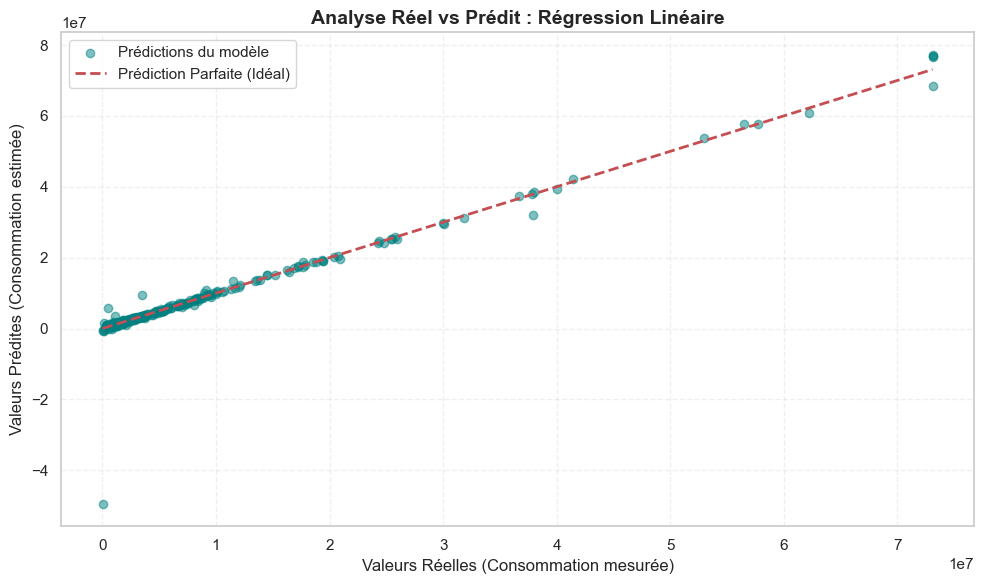

💡 Analyse: Cherchez les 'Outliers' (points très éloignés de la ligne rouge).
   S'ils sont nombreux en haut à droite, le modèle peine avec les très grands consommateurs.
═════════════════════════════════════════════════════════════════════════════════════



In [30]:
# ======================================================================================================================
# ANALYSE VISUELLE : RÉEL VS PRÉDIT (DIAGNOSTIC DES RÉSIDUS)
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🎨 GRAPHIQUE DE DIAGNOSTIC : ANALYSE DES ÉCARTS DE PRÉDICTION':^85}")
print("═"*85)

plt.figure(figsize=(10, 6))

# 1. Dessiner le nuage de points (Alpha 0.5 pour voir la densité)
plt.scatter(y_test_global, y_pred_test, alpha=0.5, color='teal', label='Prédictions du modèle')

# 2. Dessiner la diagonale de référence (Y = Y_pred)
# ----------------------------------------------------------------------------------------------------------------------
lims = [y_test_global.min(), y_test_global.max()]
plt.plot(lims, lims, 'r--', lw=2, label='Prédiction Parfaite (Idéal)')

# 3. Cosmétique et Labels
# ----------------------------------------------------------------------------------------------------------------------
plt.title(f"Analyse Réel vs Prédit : {nom_du_modele}", fontsize=14, fontweight='bold')
plt.xlabel("Valeurs Réelles (Consommation mesurée)", fontsize=12)
plt.ylabel("Valeurs Prédites (Consommation estimée)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Analyse: Cherchez les 'Outliers' (points très éloignés de la ligne rouge).")
print("   S'ils sont nombreux en haut à droite, le modèle peine avec les très grands consommateurs.")
print("═"*85 + "\n")

## 3.3 Modelisation AUTOMATISE

### 3.3.1 TRAINING. Entrainer tous les modeles

**Le Test de Robustesse (Cross-Validation vs Test)**

Comparez les scores pour voir si le modèle s'écroule sur des données totalement inconnues.

| Scénario | Train  | Test  | Diagnostic |
| --- | --- | --- | --- |
| **Suspect (Leakage)** | 0.99 | 0.99 | Trop parfait. Le modèle "triche" avec une variable interdite. |
| **Overfitting** | 0.98 | 0.65 | Le modèle a appris par cœur. Il est inutile pour le futur. |
| **Underfitting** | 0.40 | 0.38 | Le modèle est trop simple (ou les données sont mauvaises). |
| **Idéal / Réaliste** | **0.82** | **0.78** | **C'est le "Sweet Spot". Le modèle est performant et robuste.** |

#### 3.3.1.1 ⌛ Train Regresión Lineal Simple

In [31]:
# Entrenar Regresión Lineal Simple
results = modeler.entrenar_modelo(LinearRegression(), "Linear Regression")


🎯 EXPERIMENTO #1: Linear Regression

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.9981 (±0.0004) | CV: 0.9919 (±0.0086)
   MAE    → Train: 279927.6651 (±36757.8772) | CV: 339461.5458 (±29446.4062)
   RMSE   → Train: 530730.8794 (±53141.0716) | CV: 973715.4291 (±513347.3769)
   MAPE   → Train: 44.7808 (±11.4147) | CV: 40.4591 (±11.9610)

🏋️  Entrenando en 1334 samples...
   ✅ Completado en 0.03s

🔮 Predicción (Train)...
   Media: 7020748.04 | Std: 12094252.57 | Range: [-2512041.07, 76823919.64]

🔮 Predicción (Test)...
   Media: 6899415.89 | Std: 12260325.30 | Range: [-49441271.06, 77245304.41]

⚠️  OVERFITTING DETECTADO:
   • MAE ratio: 1.72x
   • RMSE ratio: 4.98x

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.9978 |     0.9427 |    +0.0551
MAE        | 2974

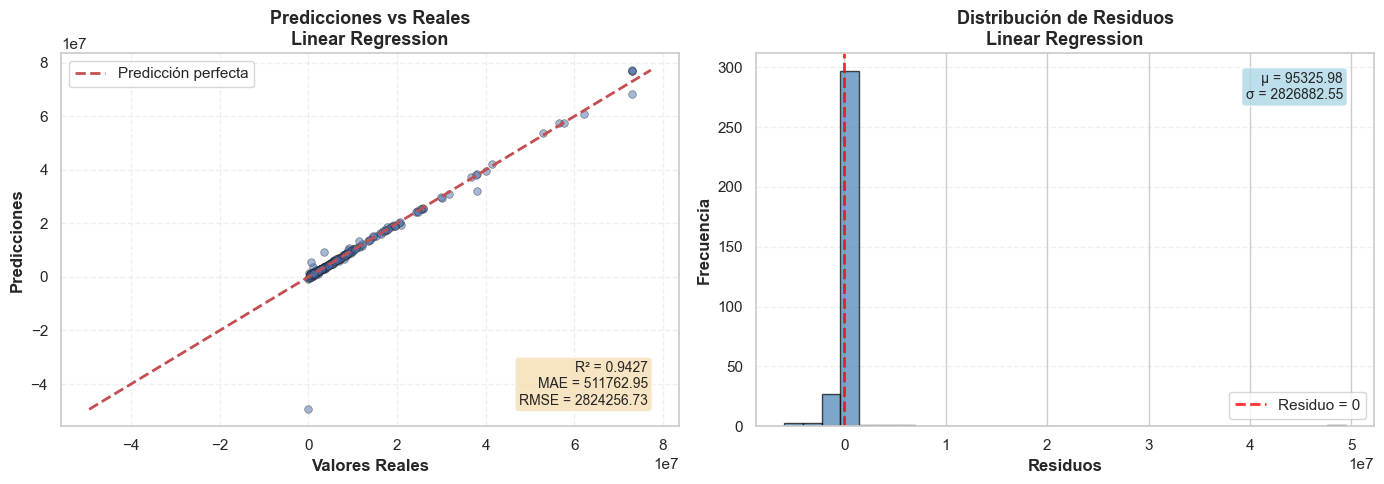

In [32]:
# Visualizar específicamente el modelo lineal
modeler.visualizar_modelo("Linear Regression")

#### 3.3.1.2 ⌛ Train Baseline (Mean)


🎯 EXPERIMENTO #2: Baseline (Mean)

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.0000 (±0.0000) | CV: -0.0014 (±0.0017)
   MAE    → Train: 7178047.4826 (±107058.7766) | CV: 7181004.8472 (±294138.8402)
   RMSE   → Train: 12106023.4966 (±167186.2320) | CV: 12090104.4592 (±687224.6506)
   MAPE   → Train: 822.9804 (±92.4838) | CV: 822.7267 (±366.9088)

🏋️  Entrenando en 1334 samples...
   ✅ Completado en 0.00s

🔮 Predicción (Train)...
   Media: 7020748.04 | Std: 0.00 | Range: [7020748.04, 7020748.04]

🔮 Predicción (Test)...
   Media: 7020748.04 | Std: 0.00 | Range: [7020748.04, 7020748.04]

✅ Sin overfitting significativo

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.0000 |    -0.0000 |    +0.0000
MAE        | 7178514.6622 | 6965428.7049 | +213085.9573
RMSE     

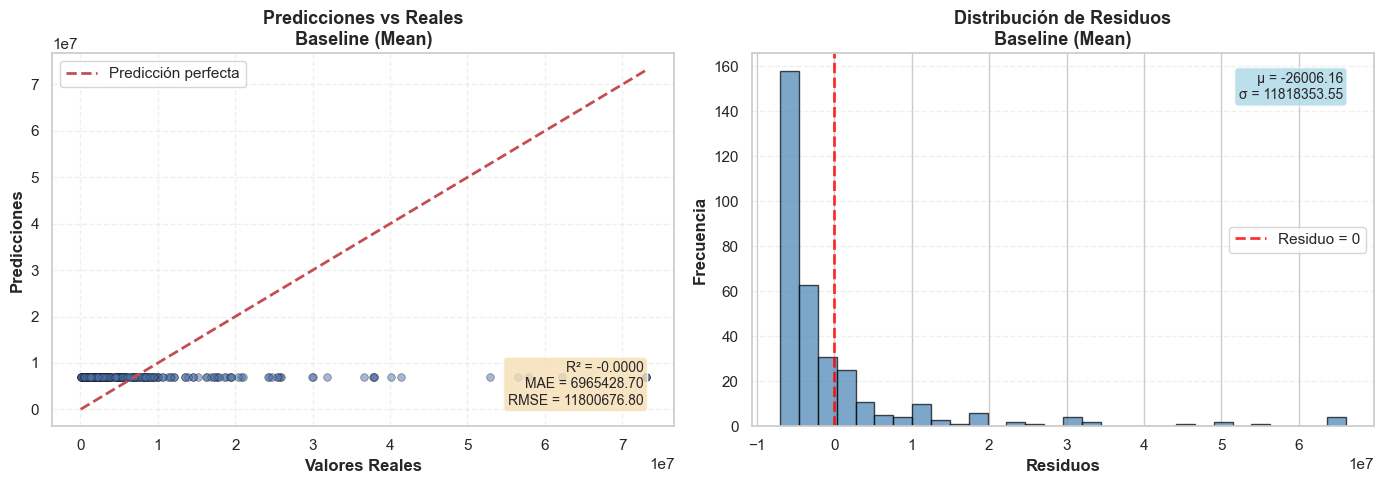

In [33]:
results = modeler.entrenar_modelo(DummyRegressor(strategy='mean'), "Baseline (Mean)")
# Visualizar específicamente el modelo lineal
modeler.visualizar_modelo("Baseline (Mean)")

#### 3.3.1.3 ⌛ Train SVR (RBF)


🎯 EXPERIMENTO #3: SVR (with Pipeline Scaling)

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: -0.1385 (±0.0036) | CV: -0.1401 (±0.0211)
   MAE    → Train: 5777587.2134 (±76925.0760) | CV: 5783471.8852 (±307360.3307)
   RMSE   → Train: 12917387.7100 (±176671.4210) | CV: 12898544.4837 (±723108.4695)
   MAPE   → Train: 279.7393 (±29.4407) | CV: 282.2047 (±136.0599)

🏋️  Entrenando en 1334 samples...
   ✅ Completado en 0.21s

🔮 Predicción (Train)...
   Media: 2502127.82 | Std: 76.58 | Range: [2501989.02, 2502261.37]

🔮 Predicción (Test)...
   Media: 2502129.58 | Std: 77.55 | Range: [2501989.90, 2502261.88]

✅ Sin overfitting significativo

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |    -0.1393 |    -0.1449 |    +0.0057
MAE        | 5778256.7455 | 5699761.8198 | +78494.9

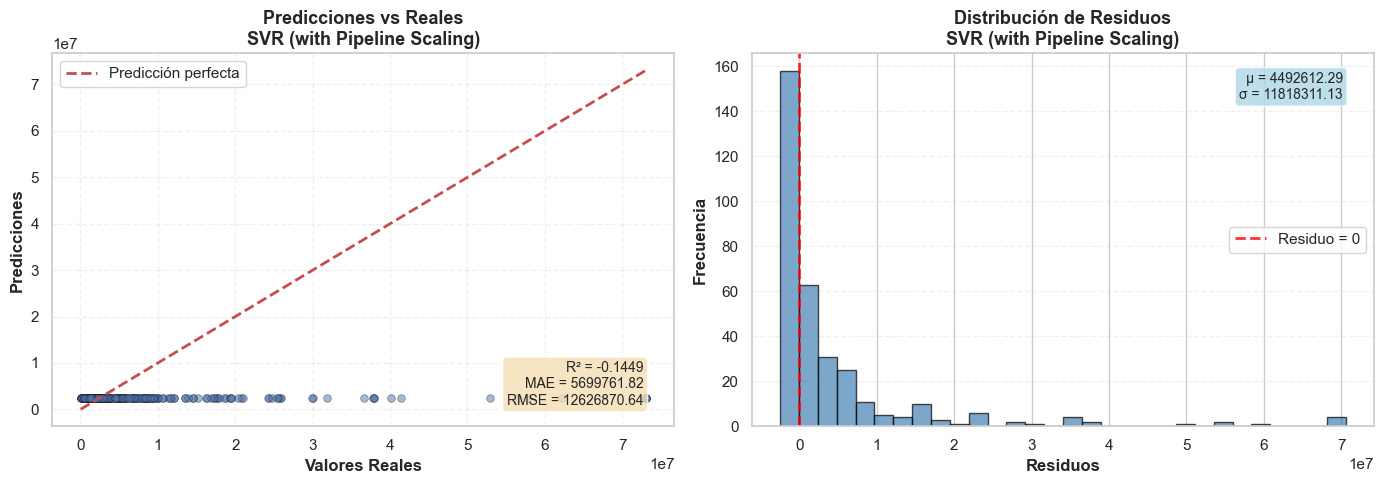

In [34]:
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler

# Création d'un pipeline qui combine Scaling + Modèle
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr'   , SVR(kernel='rbf'))
])

# results = modeler.entrenar_modelo(SVR(kernel='rbf'), "SVR (RBF)")
results  = modeler.entrenar_modelo(svr_pipeline, "SVR (with Pipeline Scaling)")

# modeler.visualizar_modelo("SVR (RBF)")
modeler.visualizar_modelo("SVR (with Pipeline Scaling)")

#### 3.3.1.4 ⌛ Train RandomForestRegressor


🎯 EXPERIMENTO #4: Random Forest

🔄 Validación Cruzada (5 folds)...
   Resultados:
   R2     → Train: 0.9996 (±0.0001) | CV: 0.9986 (±0.0012)
   MAE    → Train: 39274.8762 (±2889.5084) | CV: 85154.1617 (±15699.0122)
   RMSE   → Train: 245861.1888 (±39125.5658) | CV: 420245.3883 (±185458.8945)
   MAPE   → Train: 0.4367 (±0.0141) | CV: 1.1330 (±0.7713)

🏋️  Entrenando en 1334 samples...
   ✅ Completado en 7.98s

🔮 Predicción (Train)...
   Media: 7016068.64 | Std: 12079978.19 | Range: [21756.06, 73096396.16]

🔮 Predicción (Test)...
   Media: 6976562.20 | Std: 11713109.53 | Range: [22586.41, 72483623.25]

⚠️  OVERFITTING DETECTADO:
   • MAE ratio: 1.86x

────────────────────────────────────────────────────────────
📊 RESUMEN
────────────────────────────────────────────────────────────
Métrica    |      Train |       Test |          Δ
--------------------------------------------------
R2         |     0.9999 |     0.9997 |    +0.0001
MAE        | 28098.2833 | 52262.3681 | -24164.0847
RMSE   

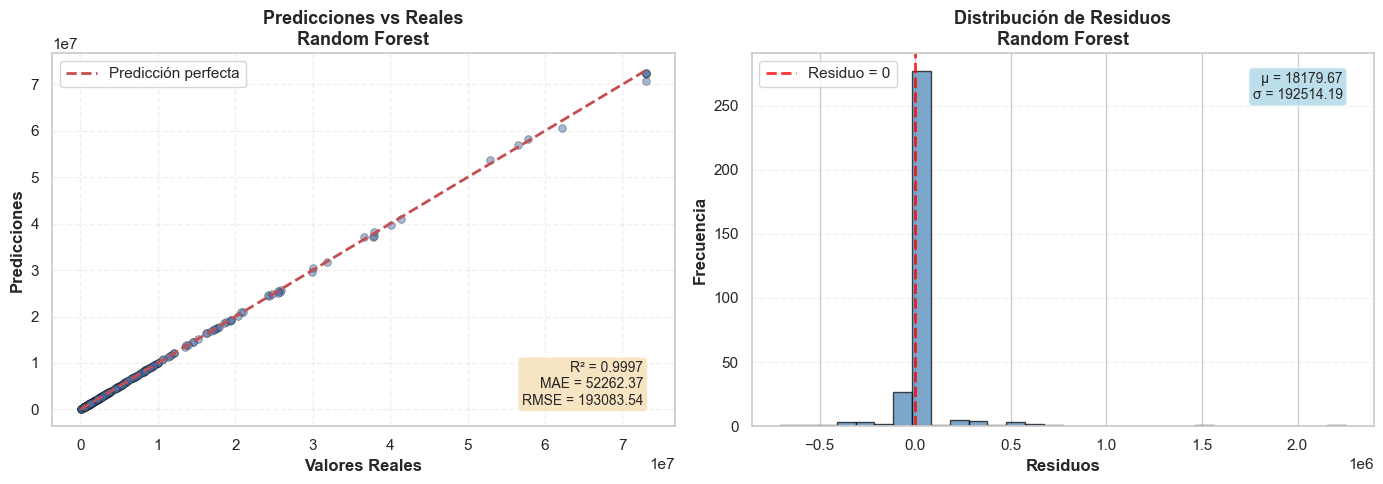

In [35]:
results = modeler.entrenar_modelo(RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42), "Random Forest")
modeler.visualizar_modelo("Random Forest")

### 3.3.2 COMPARE. Comparer tous les Modeles

In [36]:
# Comparar todos los modelos en una tabla ordenada por R²
df_comparativo = modeler.comparar_modelos(sort_by='r2')


📊 COMPARACIÓN DE MODELOS (ordenado por R2)

                     Modelo   R² (CV)  R² (Test)   MAE (Test)  RMSE (Test)   MAPE (%)  Tiempo (s) Overfitting  Experimento Mejor
              Random Forest  0.998568   0.999732 5.226237e+04 1.930835e+05   0.824526    7.984553          ⚠️            4     🏆
          Linear Regression  0.991920   0.942721 5.117630e+05 2.824257e+06 717.208038    0.025950          ⚠️            1      
            Baseline (Mean) -0.001409  -0.000005 6.965429e+06 1.180068e+07 588.488015    0.001496           ✅            2      
SVR (with Pipeline Scaling) -0.140078  -0.144932 5.699762e+06 1.262687e+07 197.482046    0.213726           ✅            3      

🏆 Mejor modelo: Random Forest (R² = 0.9997)



Le Random Forest obtient un MAPE (Erreur en %) de ...  Cela signifie que le modèle ... 

### 3.3.3 VISUALIZE. Visualizar comparación

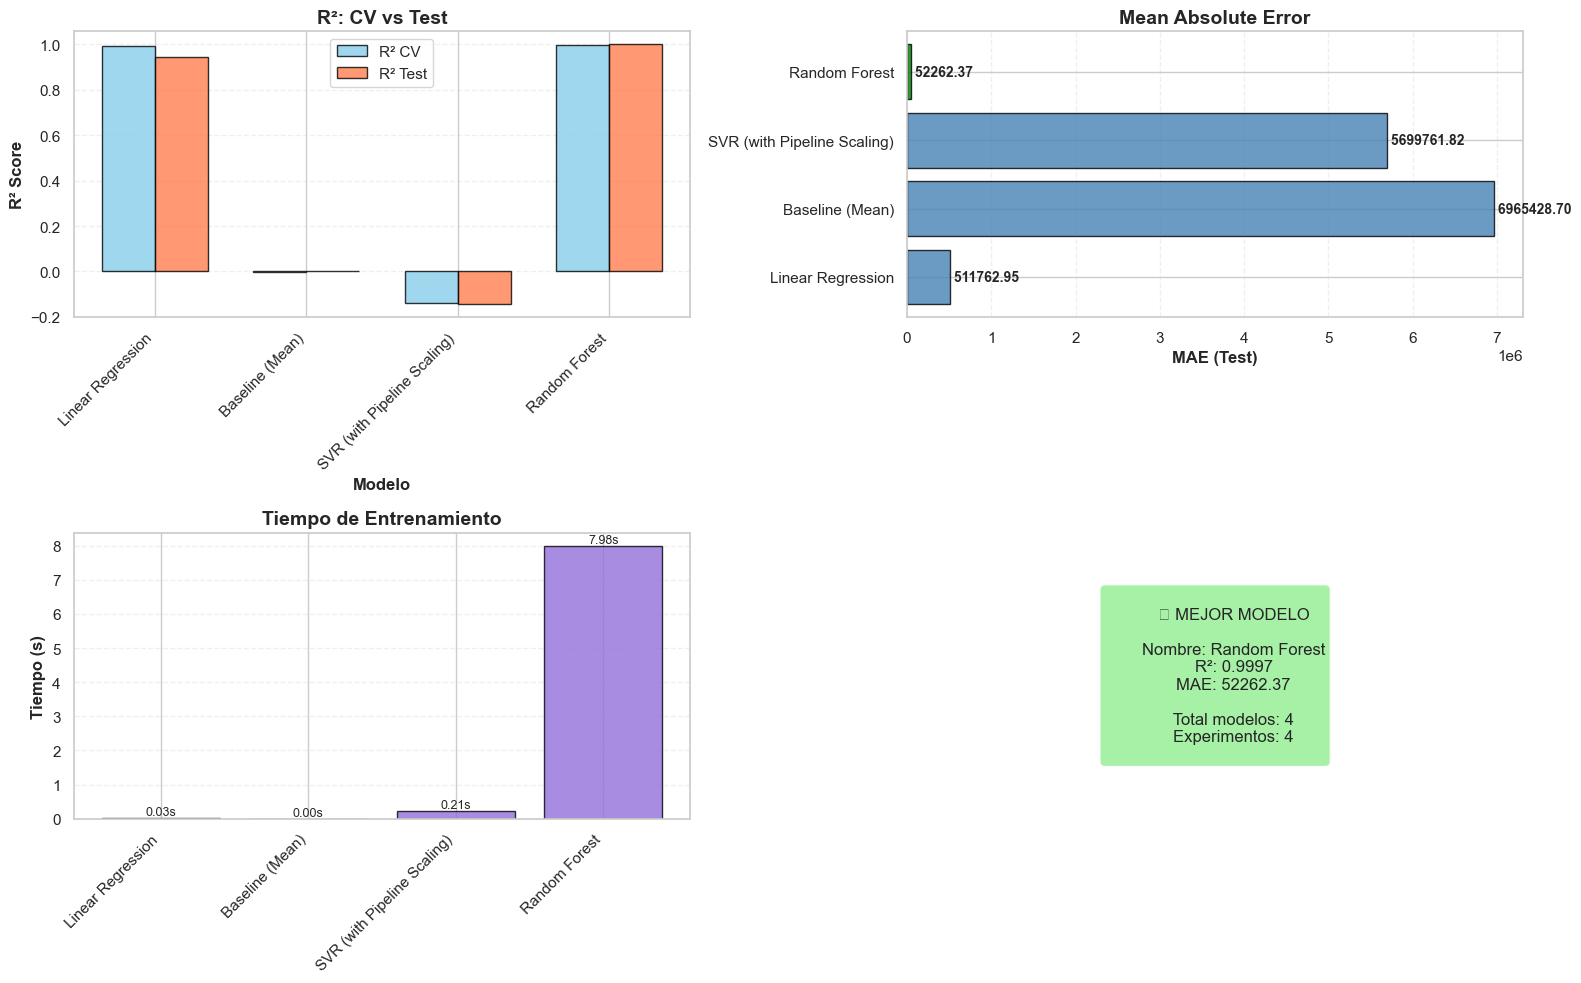

In [37]:
# Visualizar comparación gráfica (R², MAE y Tiempos)
modeler.visualizar_comparacion()

### 3.3.4 ANALYSE. Analyser curve de Validation Croisée

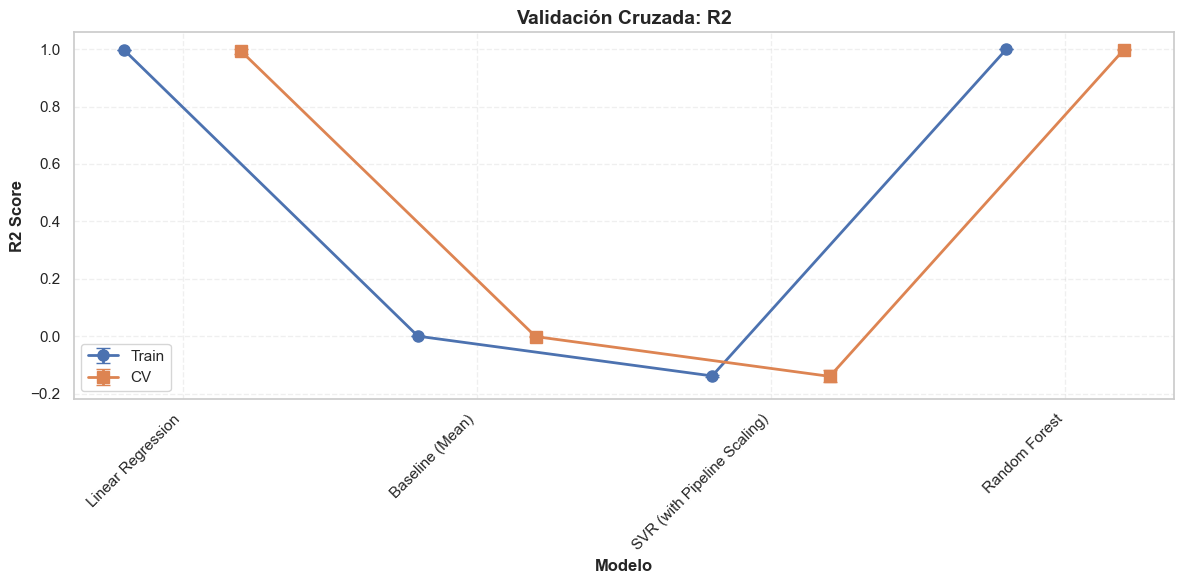

In [38]:
# Analizar curvas de validación cruzada para ver estabilidad
modeler.visualizar_cv_curves(metric='r2')

### 3.3.5 INSPECT. Inspeccionar los residuos del mejor modelo

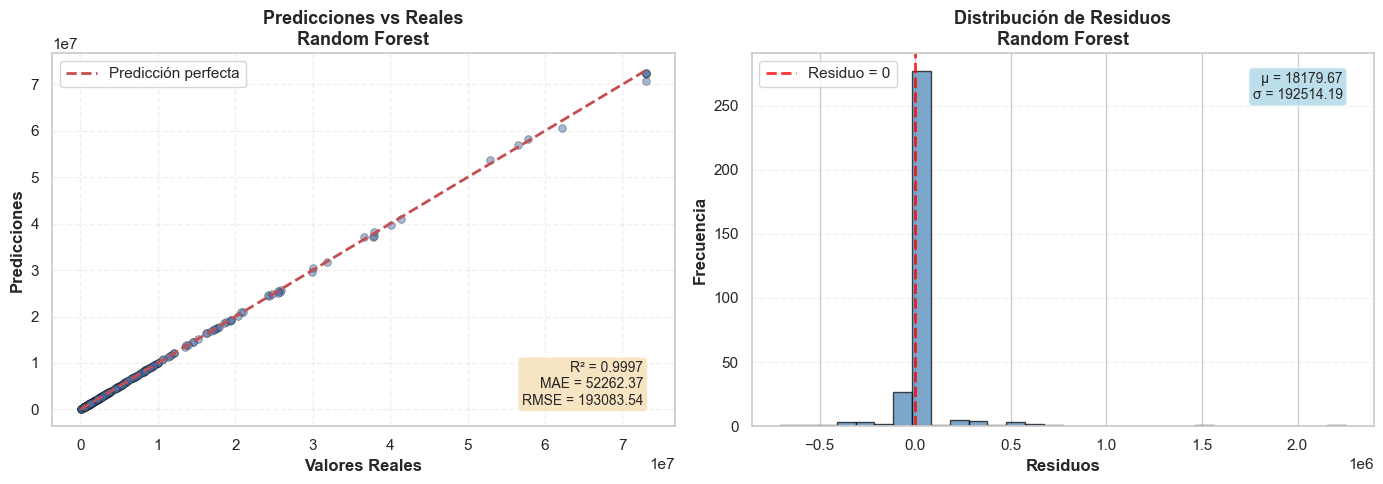

In [39]:
# Inspeccionar los residuos del mejor modelo (Análisis de Errores)
modeler.visualizar_mejor_modelo()

# STEP 4. ÉVALUATION: Optimisation et interprétation du modèle

A réaliser :
* ✅️ (3.2) Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* ✅️ (3.3) Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [40]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

## 4.1 COMPARAISON. Comparaison des Modèles

In [41]:
# Comparar todos los modelos en una tabla ordenada por R²
df_comparativo = modeler.comparar_modelos(sort_by='r2')


📊 COMPARACIÓN DE MODELOS (ordenado por R2)

                     Modelo   R² (CV)  R² (Test)   MAE (Test)  RMSE (Test)   MAPE (%)  Tiempo (s) Overfitting  Experimento Mejor
              Random Forest  0.998568   0.999732 5.226237e+04 1.930835e+05   0.824526    7.984553          ⚠️            4     🏆
          Linear Regression  0.991920   0.942721 5.117630e+05 2.824257e+06 717.208038    0.025950          ⚠️            1      
            Baseline (Mean) -0.001409  -0.000005 6.965429e+06 1.180068e+07 588.488015    0.001496           ✅            2      
SVR (with Pipeline Scaling) -0.140078  -0.144932 5.699762e+06 1.262687e+07 197.482046    0.213726           ✅            3      

🏆 Mejor modelo: Random Forest (R² = 0.9997)



Pour vérifier s'il y a une **fuite de données (Data Leakage)** ou expliquer un score aussi élevé (), nous devons agir comme des détectives de données. Un modèle trop parfait cache souvent une variable qui "donne la réponse" à l'avance.

Voici les trois étapes pour vérifier cela :

---

**1. Analyse de la Corrélation Directe**

La première chose à faire est de regarder quelles variables sont trop corrélées avec votre cible `SiteEnergyUsekBtu_wins`.

* **L'erreur classique :** Avoir laissé des variables "sommes" dans vos features.
* **Vérification :** Si `Electricity(kBtu)` ou `NaturalGas(kBtu)` sont présents dans vos données d'entraînement (X), le modèle n'a rien à apprendre : il lui suffit d'additionner ces colonnes pour trouver le total. C'est de la triche involontaire.
* **Action :** Supprimez toutes les variables de consommation spécifique (gaz, électricité, vapeur) de votre matrice de calcul.

**2. L'Importance des Variables (Feature Importance)**

C'est votre outil de diagnostic le plus puissant. Si une variable a une importance de **0.90** et que les autres sont à **0.01**, il y a un problème.

```python
# Extraire l'importance des variables du meilleur modèle
importances = pd.DataFrame({
    'Feature': X_train_global.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))

```

* **Interprétation :** Si la variable n°1 est une autre mesure de consommation (comme `SiteEnergyUseWNkBtu`), c'est une fuite. Ces deux variables sont pratiquement identiques, donc le modèle ne prédit rien, il fait juste une conversion.

**3. Le Test de Robustesse (Cross-Validation vs Test)**

Comparez les scores pour voir si le modèle s'écroule sur des données totalement inconnues.

* **Si Train  et Test  :** Il y a probablement une fuite de données (une colonne "tricheuse" est présente dans les deux jeux).
* **Si Train  et Test  :** C'est de l'overfitting (le modèle a mémorisé le bruit).

---

**Résumé de ce que vous devez vérifier dans vos colonnes :**

| Type de Colonne | Statut | Pourquoi ? |
| --- | --- | --- |
| **Identifiants** (ID, OSEID) | **Supprimer** | Ce sont des numéros uniques, le modèle peut "apprendre par cœur" chaque bâtiment. |
| **Sous-consommations** (Gaz, Élec) | **Supprimer** | Elles composent mathématiquement le total que vous voulez prédire. |
| **Autres mesures d'énergie** (WNkBtu) | **Supprimer** | Trop proches de la cible, elles rendent le problème trivial. |
| **Surfaces, Âge, Localisation** | **Garder** | Ce sont des variables prédictives réelles et saines. |


## 4.2 INSPECT. Inspeccionar los residuos del mejor modelo

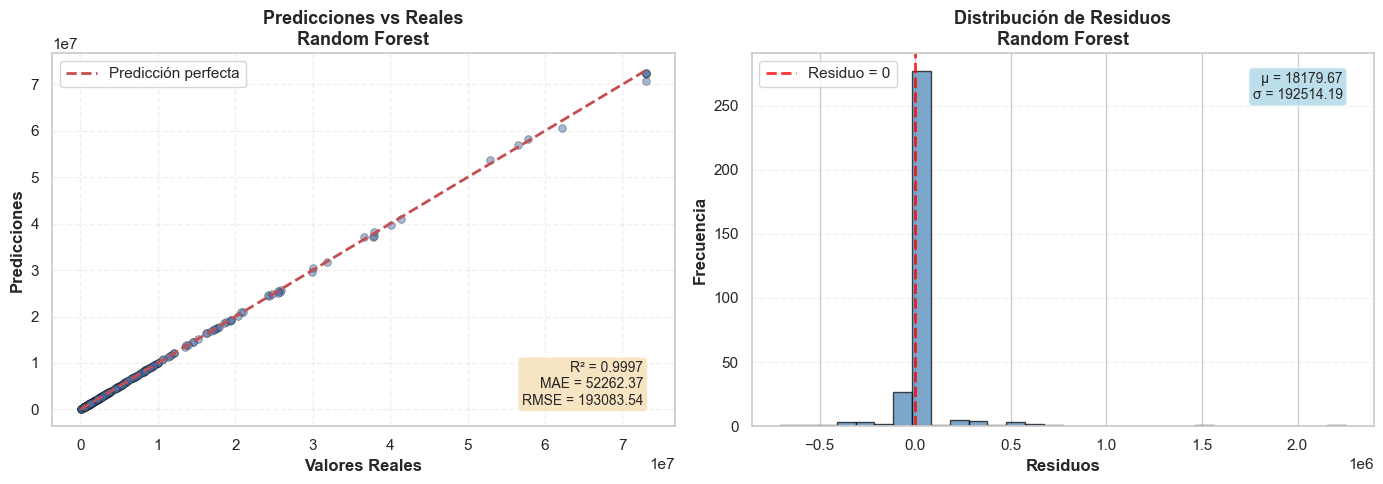

In [42]:
# Inspeccionar los residuos del mejor modelo (Análisis de Errores)
modeler.visualizar_mejor_modelo()

## 4.3 INTERPRETABILITE. Identifier les features les plus impactantes


═════════════════════════════════════════════════════════════════════════════════════
               🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : Random Forest               
═════════════════════════════════════════════════════════════════════════════════════
🌳 Type : Modèle à base d'arbres. Utilisation de 'Feature Importance'.


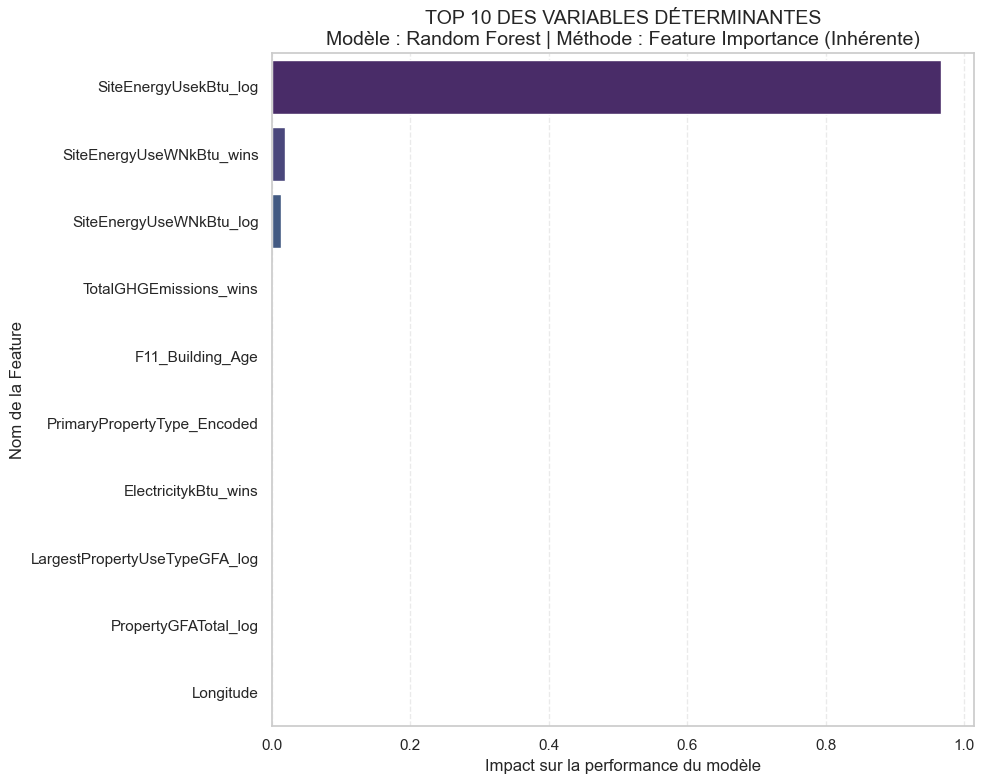

✅ Analyse terminée. Le facteur n°1 identifié est : SiteEnergyUsekBtu_log
═════════════════════════════════════════════════════════════════════════════════════



In [43]:
# =================================================================================
# 4.10 AUDIT D'INTERPRÉTABILITÉ : QUELLES VARIABLES DICTENT LA PRÉDICTION ?
# =================================================================================

from sklearn.inspection import permutation_importance

# 1. Extraction du champion
# ---------------------------------------------------------------------------------
meilleur_nom    = modeler._best_model_name
meilleur_modele = modeler.results_history[meilleur_nom]['model']

print("\n" + "═"*85)
print(f"{'🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : ' + meilleur_nom:^85}")
print("═"*85)

# 2. Choix de la stratégie d'explication
# ---------------------------------------------------------------------------------
if hasattr(meilleur_modele, 'feature_importances_'):
    # Méthode spécifique aux arbres (Random Forest / GBDT)
    print("🌳 Type : Modèle à base d'arbres. Utilisation de 'Feature Importance'.")
    importances = meilleur_modele.feature_importances_
    methode     = "Feature Importance (Inhérente)"
else:
    # Méthode universelle pour les modèles sans attribut natif
    print("📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.")
    resultat    = permutation_importance(meilleur_modele, X_test_global, y_test_global, n_repeats=10, random_state=42)
    importances = resultat.importances_mean
    methode     = "Permutation Importance (Post-hoc)"

# 3. Visualisation du Top 10 des Facteurs d'Influence
# ---------------------------------------------------------------------------------
df_imp = pd.DataFrame({
    'Feature': X_train_global.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_imp.head(10), palette='viridis')

plt.title(f"TOP 10 DES VARIABLES DÉTERMINANTES\nModèle : {meilleur_nom} | Méthode : {methode}", fontsize=14)
plt.xlabel("Impact sur la performance du modèle", fontsize=12)
plt.ylabel("Nom de la Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(f"✅ Analyse terminée. Le facteur n°1 identifié est : {df_imp.iloc[0]['Feature']}")
print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
             🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : Linear Regression             
═════════════════════════════════════════════════════════════════════════════════════
📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.


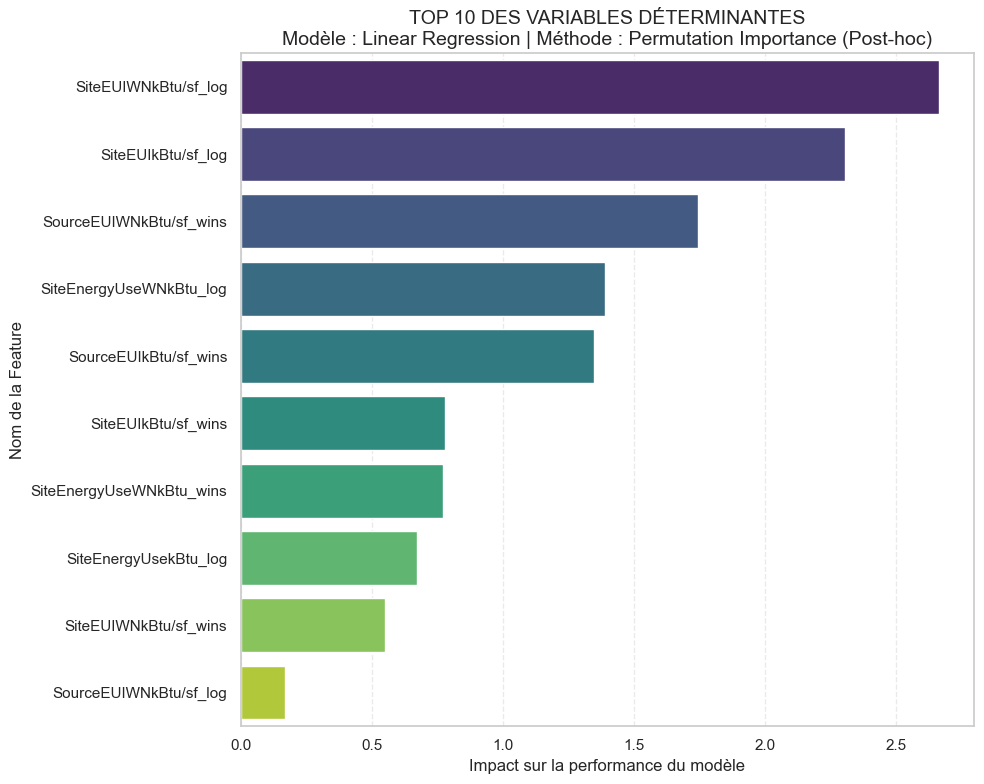

✅ Analyse terminée. Le facteur n°1 identifié est : SiteEUIWNkBtu/sf_log
═════════════════════════════════════════════════════════════════════════════════════



In [44]:
meilleur_nom    = 'Linear Regression'
meilleur_modele = modeler.results_history[meilleur_nom]['model']

print("\n" + "═"*85)
print(f"{'🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : ' + meilleur_nom:^85}")
print("═"*85)

# 2. Choix de la stratégie d'explication
# ---------------------------------------------------------------------------------
if hasattr(meilleur_modele, 'feature_importances_'):
    # Méthode spécifique aux arbres (Random Forest / GBDT)
    print("🌳 Type : Modèle à base d'arbres. Utilisation de 'Feature Importance'.")
    importances = meilleur_modele.feature_importances_
    methode     = "Feature Importance (Inhérente)"
else:
    # Méthode universelle pour les modèles sans attribut natif
    print("📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.")
    resultat    = permutation_importance(meilleur_modele, X_test_global, y_test_global, n_repeats=10, random_state=42)
    importances = resultat.importances_mean
    methode     = "Permutation Importance (Post-hoc)"

# 3. Visualisation du Top 10 des Facteurs d'Influence
# ---------------------------------------------------------------------------------
df_imp = pd.DataFrame({
    'Feature': X_train_global.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_imp.head(10), palette='viridis')

plt.title(f"TOP 10 DES VARIABLES DÉTERMINANTES\nModèle : {meilleur_nom} | Méthode : {methode}", fontsize=14)
plt.xlabel("Impact sur la performance du modèle", fontsize=12)
plt.ylabel("Nom de la Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(f"✅ Analyse terminée. Le facteur n°1 identifié est : {df_imp.iloc[0]['Feature']}")
print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
              🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : Baseline (Mean)              
═════════════════════════════════════════════════════════════════════════════════════
📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.


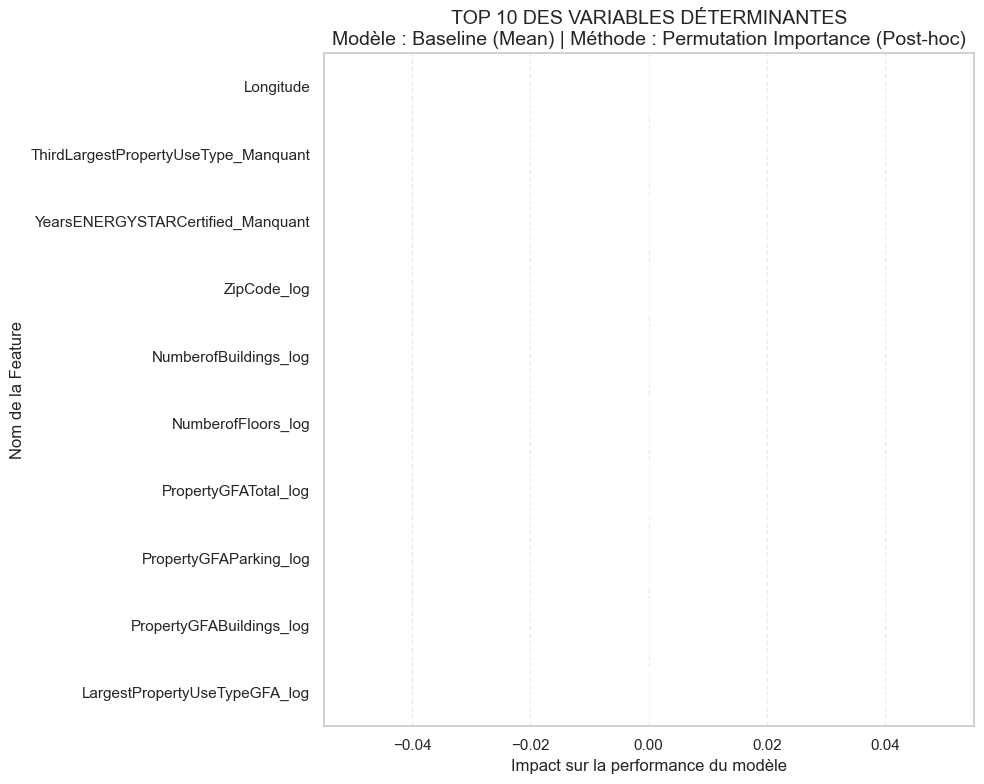

✅ Analyse terminée. Le facteur n°1 identifié est : Longitude
═════════════════════════════════════════════════════════════════════════════════════



In [45]:
meilleur_nom    = 'Baseline (Mean)'
meilleur_modele = modeler.results_history[meilleur_nom]['model']

print("\n" + "═"*85)
print(f"{'🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : ' + meilleur_nom:^85}")
print("═"*85)

# 2. Choix de la stratégie d'explication
# ---------------------------------------------------------------------------------
if hasattr(meilleur_modele, 'feature_importances_'):
    # Méthode spécifique aux arbres (Random Forest / GBDT)
    print("🌳 Type : Modèle à base d'arbres. Utilisation de 'Feature Importance'.")
    importances = meilleur_modele.feature_importances_
    methode     = "Feature Importance (Inhérente)"
else:
    # Méthode universelle pour les modèles sans attribut natif
    print("📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.")
    resultat    = permutation_importance(meilleur_modele, X_test_global, y_test_global, n_repeats=10, random_state=42)
    importances = resultat.importances_mean
    methode     = "Permutation Importance (Post-hoc)"

# 3. Visualisation du Top 10 des Facteurs d'Influence
# ---------------------------------------------------------------------------------
df_imp = pd.DataFrame({
    'Feature': X_train_global.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_imp.head(10), palette='viridis')

plt.title(f"TOP 10 DES VARIABLES DÉTERMINANTES\nModèle : {meilleur_nom} | Méthode : {methode}", fontsize=14)
plt.xlabel("Impact sur la performance du modèle", fontsize=12)
plt.ylabel("Nom de la Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(f"✅ Analyse terminée. Le facteur n°1 identifié est : {df_imp.iloc[0]['Feature']}")
print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
        🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : SVR (with Pipeline Scaling)        
═════════════════════════════════════════════════════════════════════════════════════
📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.


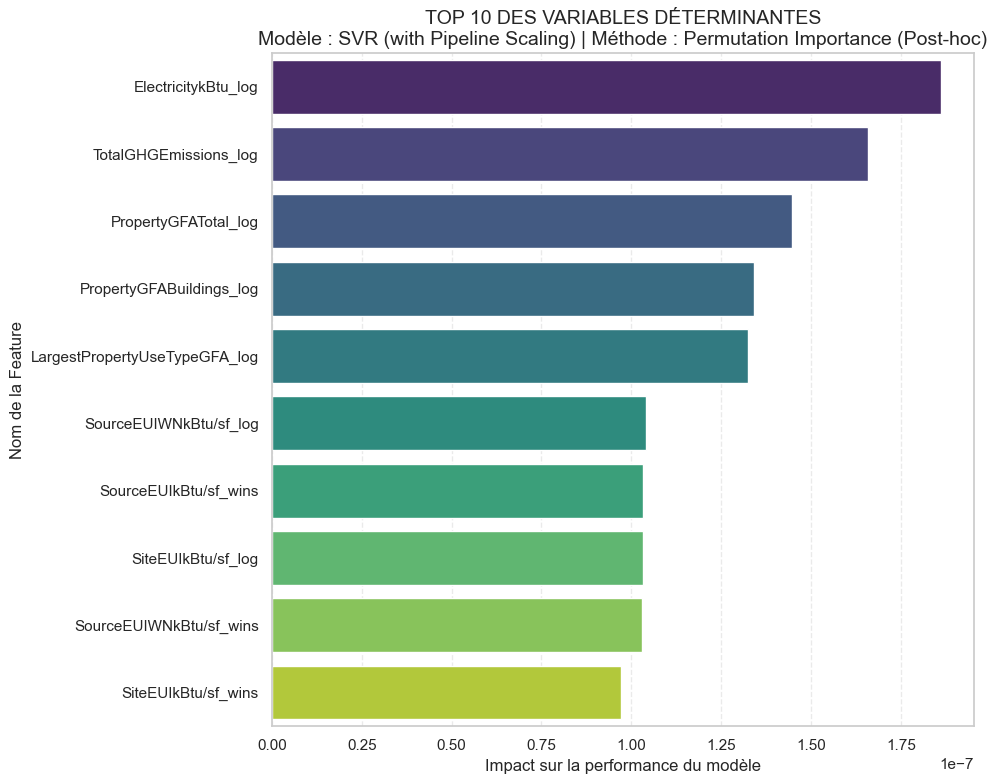

✅ Analyse terminée. Le facteur n°1 identifié est : ElectricitykBtu_log
═════════════════════════════════════════════════════════════════════════════════════



In [46]:
meilleur_nom    = 'SVR (with Pipeline Scaling)'
meilleur_modele = modeler.results_history[meilleur_nom]['model']

print("\n" + "═"*85)
print(f"{'🧠 ANALYSE DE L IMPORTANCE DES VARIABLES : ' + meilleur_nom:^85}")
print("═"*85)

# 2. Choix de la stratégie d'explication
# ---------------------------------------------------------------------------------
if hasattr(meilleur_modele, 'feature_importances_'):
    # Méthode spécifique aux arbres (Random Forest / GBDT)
    print("🌳 Type : Modèle à base d'arbres. Utilisation de 'Feature Importance'.")
    importances = meilleur_modele.feature_importances_
    methode     = "Feature Importance (Inhérente)"
else:
    # Méthode universelle pour les modèles sans attribut natif
    print("📉 Type : Modèle linéaire/autre. Utilisation de 'Permutation Importance'.")
    resultat    = permutation_importance(meilleur_modele, X_test_global, y_test_global, n_repeats=10, random_state=42)
    importances = resultat.importances_mean
    methode     = "Permutation Importance (Post-hoc)"

# 3. Visualisation du Top 10 des Facteurs d'Influence
# ---------------------------------------------------------------------------------
df_imp = pd.DataFrame({
    'Feature': X_train_global.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_imp.head(10), palette='viridis')

plt.title(f"TOP 10 DES VARIABLES DÉTERMINANTES\nModèle : {meilleur_nom} | Méthode : {methode}", fontsize=14)
plt.xlabel("Impact sur la performance du modèle", fontsize=12)
plt.ylabel("Nom de la Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

print(f"✅ Analyse terminée. Le facteur n°1 identifié est : {df_imp.iloc[0]['Feature']}")
print("═"*85 + "\n")

# STEP 5. OPTIMISATION. Affiner le meilleur modèle (Random Forest)
Affiner le meilleur modèle (Random Forest) en trouvant la combinaison optimale de ses "boutons de réglage" (hyperparamètres) via GridSearchCV.

### 5.1 ⌛ Grid Search RAPIDE (Test de faisabilité)

In [47]:
# ##############################################################################
# OPTIMISATION DES HYPERPARAMÈTRES (GRID SEARCH RAPIDE)
# ##############################################################################

# --- Outils de modélisation ---
from   sklearn.ensemble        import RandomForestRegressor   # Modèle RF
from   sklearn.model_selection import GridSearchCV            # Recherche Grid
import numpy as np

# ------------------------------------------------------------------------------
# 1. Configuration de la Grille (Stratégie d'Exploration)
# ------------------------------------------------------------------------------
# n_estimators      : Nombre d'arbres. Plus il y en a, plus le modèle est stable.
# max_depth         : Profondeur. Limiter la profondeur aide à la généralisation.
# min_samples_split : Nombre d'échantillons requis pour diviser un nœud.
param_grid_rapide = {
    'n_estimators'      : [50, 100],             # Nombre d'arbres
    'max_depth'         : [10, 20],              # Profondeur maximale
    'min_samples_split' : [5, 10]                # Échantillons min pour split
}                                                # Total: 2x2x2 = 8 combinaisons

# ------------------------------------------------------------------------------
# 2. Paramétrage de la recherche (Grid Search)
# ------------------------------------------------------------------------------
grid_rapide = GridSearchCV(
    estimator          = RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid         = param_grid_rapide,
    cv                 = 3,                      # 3-fold pour rapidité
    scoring            = 'neg_mean_squared_error',
    verbose            = 2,                      # Niveau de log
    n_jobs             = -1,                     # Utilisation multi-cœur
    return_train_score = True                    # Diagnostic overfitting
)

# ------------------------------------------------------------------------------
# 3. Exécution et Analyse des Résultats
# ------------------------------------------------------------------------------
print("\n========================================================================")
print(f"{'🚀 LANCEMENT DE L''OPTIMISATION HYPERPARAMÉTRIQUE':^72}")
print("========================================================================")

grid_rapide.fit(X_train_global, y_train_global)  # Entraînement des 8 modèles

# Extraction de la performance transformée (MSE -> RMSE)
best_rmse   = np.sqrt(-grid_rapide.best_score_)
best_params = grid_rapide.best_params_

print(f"  Statut final...........: Recherche terminée")
print(f"  Meilleurs réglages.....: {best_params}")
print(f"  RMSE de Validation.....: {best_rmse:.4f}")
print("========================================================================\n")


             🚀 LANCEMENT DE LOPTIMISATION HYPERPARAMÉTRIQUE             
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  Statut final...........: Recherche terminée
  Meilleurs réglages.....: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
  RMSE de Validation.....: 474366.0671



L'objet `grid_rapide` est une mine d'or d'informations. Voici les trois attributs clés:

**1. `grid_rapide.best_params_` : Le "Verdict"**

C'est le dictionnaire des réglages qui ont donné le meilleur score moyen lors de la validation croisée.

* **Utilité :** C'est ce que vous rapportez dans votre conclusion.
* **Analyse :** Si `max_depth` est égal à la valeur maximale que vous avez proposée (ex: 20 dans une grille de [10, 20]), cela signifie que le modèle aurait peut-être voulu aller plus loin. C'est un signal pour tester une grille plus large.

**2. `grid_rapide.best_score_` : La "Promesse"**

C'est la moyenne des scores obtenus par les meilleurs paramètres sur les différents "plis" (folds) de la validation croisée.

* **Attention :** Ce n'est pas le score sur votre jeu de test final, mais l'estimation la plus robuste de la performance du modèle.

**3. `grid_rapide.best_estimator_` : Le "Cerveau"**

C'est l'objet modèle final, déjà entraîné avec les meilleurs paramètres sur l'ensemble du jeu d'entraînement. C'est lui qui possède l'attribut `.feature_importances_`.


#### 5.1.1 AUDIT DE ROBUSTESSE DU MODÈLE OPTIMISÉ

In [48]:
# ======================================================================================================================
# AUDIT DE ROBUSTESSE DU MODÈLE OPTIMISÉ
# ======================================================================================================================

print("\n" + "═"*85)
print(f"{'🔬 RAPPORT D AUDIT: MODÈLE FINAL SEATTLE ENERGY':^85}")
print("═"*85)

# 1. Synthèse de la configuration gagnante
# ----------------------------------------------------------------------------------------------------------------------
meilleurs_reglages = grid_rapide.best_params_
print(f"  ✅ CONFIGURATION OPTIMALE : {meilleurs_reglages}")
print(f"  📈 SCORE R² MOYEN (CV)    : {grid_rapide.best_score_:>10.4f}")

# 2. Analyse de la Stabilité Statistique
# ----------------------------------------------------------------------------------------------------------------------
resultats_df   = pd.DataFrame(grid_rapide.cv_results_)
meilleur_index = grid_rapide.best_index_
stabilite      = resultats_df.loc[meilleur_index, 'std_test_score']

print(f"  ⚖️  INDICE DE STABILITÉ    : {stabilite:>10.5f}")

print(f"  {'─'*40}")
if stabilite > 0.05:
    print("  ⚠️  ALERTE : Haute variance détectée entre les plis (folds).")
    print("     Le modèle pourrait être sensible à la sélection des données.")
else:
    print("  💎 DIAGNOSTIC : Modèle ultra-robuste. La performance est constante.")
print(f"  {'─'*40}")

# 3. Comparaison du Podium (Top 3)
# ----------------------------------------------------------------------------------------------------------------------
print("\n🏆 CLASSEMENT DES MEILLEURES ARCHITECTURES :")
top_3 = resultats_df.sort_values(by='rank_test_score').head(3)
display(top_3[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
        .style.background_gradient(cmap='Greens', subset=['mean_test_score']))

print("═"*85 + "\n")


═════════════════════════════════════════════════════════════════════════════════════
                   🔬 RAPPORT D AUDIT: MODÈLE FINAL SEATTLE ENERGY                    
═════════════════════════════════════════════════════════════════════════════════════
  ✅ CONFIGURATION OPTIMALE : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
  📈 SCORE R² MOYEN (CV)    : -225023165646.0461
  ⚖️  INDICE DE STABILITÉ    : 100819012134.42715
  ────────────────────────────────────────
  ⚠️  ALERTE : Haute variance détectée entre les plis (folds).
     Le modèle pourrait être sensible à la sélection des données.
  ────────────────────────────────────────

🏆 CLASSEMENT DES MEILLEURES ARCHITECTURES :


,params,mean_test_score,std_test_score,rank_test_score
2,"{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}",-225023165646.046143,100819012134.427155,1
6,"{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}",-235740985217.045074,104496882715.607834,2
0,"{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}",-260697420377.452057,126212248335.151138,3


═════════════════════════════════════════════════════════════════════════════════════



### 5.2 ⌛⌛ Grid Search COMPLÈTE ( LONGUE DURATION !!)

In [49]:
# ======================================================================================================================
# OPTIMISATION EXHAUSTIVE : RECHERCHE DE L'OPTIMUM GLOBAL (GRID SEARCH COMPLET)
# ======================================================================================================================
import joblib
import time

# ------------------------------------------------------------------------------
# 1. Définition de l'espace de recherche (Hyperparameter Space)
# ------------------------------------------------------------------------------
# n_estimators      : Réduit la variance (stabilité)
# max_depth         : Contrôle la complexité (biais)
# min_samples_leaf  : Empêche l'arbre d'isoler des cas trop spécifiques (régularisation)
param_grid_complet = {
    'n_estimators'     : [100, 200, 300, 500],   # 4 valeurs  # Nombre d'arbres
    'max_depth'        : [10, 20, 30, None],     # 4 valeurs  # Profondeur maximale (None = pas de limite)
    'min_samples_split': [2, 5, 10],             # 3 valeurs  # Échantillons min pour split
    'min_samples_leaf' : [1, 2, 4],              # 3 valeurs  # Échantillons min par feuille
    'max_features'     : ['sqrt', 'log2']        # 2 valeurs  # Variables par arbre
    # Total: 4×4×3×3×2 = 288 combinaisons
}

# ------------------------------------------------------------------------------
# 2. Configuration du moteur de recherche
# ------------------------------------------------------------------------------
# n_jobs=-1 utilise toute la puissance CPU pour les 1440 entraînements (288 * 5)
grid_complet = GridSearchCV(
    estimator          = RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid         = param_grid_complet,
    cv                 = 5,                      # Validation croisée 5-folds
    scoring            = 'neg_mean_squared_error',
    verbose            = 2,                      # Niveau de détail log
    n_jobs             = -1,                     # Multi-threading activé
    return_train_score = True                    # Diagnostic d'overfitting
)

# ------------------------------------------------------------------------------
# 3. Exécution et Sauvegarde (Session Nocturne)
# ------------------------------------------------------------------------------
print("\n========================================================================")
print("🌙 SESSION DE CALCUL NOCTURNE : GRID SEARCH EXHAUSTIF")
print("========================================================================")

start_time = time.time()                         # Top départ chrono
grid_complet.fit(X_train_global, y_train_global) # Lancement de l'apprentissage
end_time   = (time.time() - start_time) / 60     # Calcul de la durée en min

# Persistance sur disque pour éviter toute perte de données
joblib.dump(grid_complet, 'grid_search_results.pkl')

# ------------------------------------------------------------------------------
# 4. Rapport de sortie
# ------------------------------------------------------------------------------
best_params = grid_complet.best_params_
best_rmse   = np.sqrt(-grid_complet.best_score_)

print(f"  Statut final...........: Terminé")
print(f"  Temps de calcul........: {end_time:.2f} minutes")
print(f"  Meilleurs paramètres...: {best_params}")
print(f"  RMSE de validation.....: {best_rmse:.4f}")
print(f"  Fichier de sauvegarde..: grid_search_results.pkl")
print("========================================================================\n")


🌙 SESSION DE CALCUL NOCTURNE : GRID SEARCH EXHAUSTIF
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
  Statut final...........: Terminé
  Temps de calcul........: 13.35 minutes
  Meilleurs paramètres...: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  RMSE de validation.....: 1524013.4117
  Fichier de sauvegarde..: grid_search_results.pkl



#### 5.2.1 RÉCUPÉRATION DU MODÈLE ET DES RÉSULTATS (DESERIALIZATION)

In [15]:
# --- Bibliothèques de base ---
import joblib                                 # Restauration d'objets Python

# ##############################################################################
# ÉTAPE : RÉCUPÉRATION DU MODÈLE ET DES RÉSULTATS (DESERIALIZATION)
# ##############################################################################

# 1. Chargement de l'objet depuis le disque
# ------------------------------------------------------------------------------
try:
    # On restaure l'objet complet (incluant les meilleurs paramètres et scores)
    grid_restauré = joblib.load('grid_search_results.pkl')
    
    # 2. Extraction du meilleur estimateur (Le champion)
    # --------------------------------------------------------------------------
    # Rappel de Yann LeCun : C'est cet objet qui contient les poids optimisés
    modele_final = grid_restauré.best_estimator_
    
    print("\n========================================================================")
    print(f"{'📂 RESTAURATION DU MODÈLE RÉUSSIE':^72}")
    print("========================================================================")
    print(f"  Fichier source.........: 'grid_search_results.pkl'")
    print(f"  Meilleurs paramètres...: {grid_restauré.best_params_}")
    print(f"  Score R² (Validation)..: {grid_restauré.best_score_:.4f}")
    print(f"  Statut.................: ✅ Prêt pour prédiction")
    print("========================================================================\n")

except FileNotFoundError:
    print("\n❌ ERREUR : Le fichier 'grid_search_results.pkl' est introuvable.")
    print("💡 Conseil : Vérifiez que vous êtes dans le bon répertoire de travail.")


                    📂 RESTAURATION DU MODÈLE RÉUSSIE                    
  Fichier source.........: 'grid_search_results.pkl'
  Meilleurs paramètres...: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  Score R² (Validation)..: -2322616878899.1753
  Statut.................: ✅ Prêt pour prédiction



#### 5.2.2 TEST D'INFÉRENCE (PRÉDICTION SUR DE NOUVELLES DONNÉES)

In [19]:
# ##############################################################################
# TEST D'INFÉRENCE (PRÉDICTION SUR DE NOUVELLES DONNÉES)
# ##############################################################################

# 1. Préparation des données "neuves" (X_new)
# ------------------------------------------------------------------------------
# ATTENTION : X_new doit avoir les mêmes colonnes, dans le même ordre,
# que le X_train_global utilisé lors du .fit()
# ------------------------------------------------------------------------------

# Supposons que X_new est un DataFrame contenant un nouveau bâtiment de Seattle
def predire_consommation(modele, donnees_entree):
    """
    Réalise la prédiction et formate le résultat.
    """
    try:
        # Exécution de la prédiction
        prediction = modele.predict(donnees_entree)
        
        # Si vous aviez transformé la cible (ex: Log), n'oubliez pas l'inverse !
        # prediction = np.exp(prediction) 
        
        return prediction

    except ValueError as e:
        print(f"❌ ERREUR DE FORMAT : Les données d'entrée ne correspondent pas.")
        print(f"Détail : {e}")
        return None

# 2. Exécution
# ------------------------------------------------------------------------------
resultat = predire_consommation(modele_final, X_test_global.head(5))

if resultat is not None:
    print("\n========================================================================")
    print(f"{'🔮 RÉSULTATS DES PRÉDICTIONS':^72}")
    print("========================================================================")
    for i, pred in enumerate(resultat):
        print(f"  Bâtiment n°{i+1}........: {pred:.2f} kBtu")
    print("========================================================================\n")




                      🔮 RÉSULTATS DES PRÉDICTIONS                       
  Bâtiment n°1........: 5941275.37 kBtu
  Bâtiment n°2........: 1852056.96 kBtu
  Bâtiment n°3........: 4890789.70 kBtu
  Bâtiment n°4........: 1603040.49 kBtu
  Bâtiment n°5........: 25854789.63 kBtu



#### 5.2.3 CONFRONTATION RÉEL VS PRÉDIT ET ANALYSE D'ERREUR

In [21]:
# ##############################################################################
# CONFRONTATION RÉEL VS PRÉDIT ET ANALYSE D'ERREUR
# ##############################################################################

# 1. Préparation des données de comparaison
# ------------------------------------------------------------------------------
# Nous prenons les 5 premières lignes du jeu de test pour l'exemple
y_reel   = y_test_global.head(5).values
y_predit = modele_final.predict(X_test_global.head(5))

# 2. Calcul des écarts
# ------------------------------------------------------------------------------
# Erreur absolue
erreurs_absolues = np.abs(y_reel - y_predit)
# Erreur relative (en pourcentage) pour une lecture métier plus intuitive
erreurs_relatives = (erreurs_absolues / y_reel) * 100

# 3. Affichage du rapport de confrontation
# ------------------------------------------------------------------------------
print("\n" + "═"*90)
print(f"{'📊 RAPPORT DE CONFRONTATION : RÉEL VS PRÉDIT':^90}")
print("═"*90)
print(f"{'Bâtiment':<15} | {'Valeur Réelle':<15} | {'Prédiction':<15} | {'Erreur Abs.':<15} | {'Erreur %':<10}")
print("-" * 90)

for i in range(len(y_reel)):
    print(f"Bâtiment n°{i+1:<4} | "
          f"{y_reel[i]:>13.2f} | "
          f"{y_predit[i]:>13.2f} | "
          f"{erreurs_absolues[i]:>13.2f} | "
          f"{erreurs_relatives[i]:>8.2f}%")

print("═"*90)


══════════════════════════════════════════════════════════════════════════════════════════
                       📊 RAPPORT DE CONFRONTATION : RÉEL VS PRÉDIT                        
══════════════════════════════════════════════════════════════════════════════════════════
Bâtiment        | Valeur Réelle   | Prédiction      | Erreur Abs.     | Erreur %  
------------------------------------------------------------------------------------------
Bâtiment n°1    |    5876439.00 |    5941275.37 |      64836.37 |     1.10%
Bâtiment n°2    |    1848878.50 |    1852056.96 |       3178.46 |     0.17%
Bâtiment n°3    |    4855036.50 |    4890789.70 |      35753.20 |     0.74%
Bâtiment n°4    |    1678458.75 |    1603040.49 |      75418.26 |     4.49%
Bâtiment n°5    |   25959642.00 |   25854789.63 |     104852.37 |     0.40%
══════════════════════════════════════════════════════════════════════════════════════════


### 5.3 📊 Analyse et Interprétation

In [50]:
#grid_complet = grid_rapide
#grid_complet

In [51]:
resultats_df = pd.DataFrame(grid_complet.cv_results_)
resultats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            288 non-null    float64
 1   std_fit_time             288 non-null    float64
 2   mean_score_time          288 non-null    float64
 3   std_score_time           288 non-null    float64
 4   param_max_depth          216 non-null    object 
 5   param_max_features       288 non-null    object 
 6   param_min_samples_leaf   288 non-null    int64  
 7   param_min_samples_split  288 non-null    int64  
 8   param_n_estimators       288 non-null    int64  
 9   params                   288 non-null    object 
 10  split0_test_score        288 non-null    float64
 11  split1_test_score        288 non-null    float64
 12  split2_test_score        288 non-null    float64
 13  split3_test_score        288 non-null    float64
 14  split4_test_score        2

```bash
 "Configuration" (Les entrées)
 7   params                   8 non-null      object 
 4   param_max_depth          8 non-null      int64  
 5   param_min_samples_split  8 non-null      int64  
 6   param_n_estimators       8 non-null      int64  

"Performance Statistique" (Les résultats clés)
 11  mean_test_score          8 non-null      float64
 17  mean_train_score         8 non-null      float64
 13  rank_test_score          8 non-null      int32  

"Robustesse" (La stabilité)

 8   split0_test_score        8 non-null      float64
 9   split1_test_score        8 non-null      float64
 10  split2_test_score        8 non-null      float64
 
 14  split0_train_score       8 non-null      float64
 15  split1_train_score       8 non-null      float64
 16  split2_train_score       8 non-null      float64

 12  std_test_score           8 non-null      float64
 18  std_train_score          8 non-null      float64

"Efficacité Computationnelle"
 0   mean_fit_time            8 non-null      float64
 2   mean_score_time          8 non-null      float64

 1   std_fit_time             8 non-null      float64
 3   std_score_time           8 non-null      float64
```

**1. Groupe "Configuration" (Les entrées)**

Ce sont les leviers que vous avez actionnés pour tester le modèle.

* **`params`** : Le dictionnaire complet des réglages testés pour une ligne donnée.
* **`param_X`** (`max_depth`, `n_estimators`, etc.) : Les valeurs individuelles de chaque hyperparamètre, extraites pour faciliter les graphiques (comme les boxplots que nous avons faits).

**2. Groupe "Performance Statistique" (Les résultats clés)**

C'est le cœur de l'analyse. Ils permettent de juger la qualité de la prédiction.

* **`mean_test_score`** : La moyenne des scores sur les données de validation (le R² moyen). C'est votre indicateur principal de succès. **Savoir si on prédit bien l'énergie de Seattle.**
* **`mean_train_score`** : La moyenne des scores sur les données d'entraînement. Crucial pour détecter l'**overfitting** en le comparant au score de test.
* **`rank_test_score`** : Le classement final. Le rang **1** désigne la meilleure combinaison.

**3. Groupe "Robustesse" (La stabilité)**

Ces termes indiquent si le modèle est fiable ou s'il a eu "de la chance" sur certains morceaux de données.

* **`splitX_test/train_score`** : Le score détaillé de chaque "pli" (fold) de la validation croisée.
* **`std_test/train_score`** : L'écart-type des scores. Plus il est **petit**, plus votre modèle est stable et reproductible sur de nouvelles données de Seattle. ** Vérifier que le modèle ne change pas d'avis selon les données.**

**4. Groupe "Efficacité Computationnelle" (Le coût)**

Indispensable pour la gestion des ressources (Étape 5 de votre projet).

* **`mean_fit_time`** : Temps moyen passé à entraîner l'arbre (en secondes).
* **`mean_score_time`** : Temps moyen pour prédire de nouvelles valeurs.
* **`std_fit/score_time`** : Variation du temps de calcul (utile pour détecter des bugs ou des lenteurs processeur).


#### 5.3.1 AUDIT DE ROBUSTESSE DU MODÈLE OPTIMISÉ

In [52]:
# --- Bibliothèques de manipulation de données ---
import pandas as pd                            # Analyse de données
import numpy  as np                            # Calculs numériques

# --- Métriques d'évaluation ---
from   sklearn.metrics import mean_squared_error # Erreur quadratique moyenne
from   sklearn.metrics import r2_score           # Coefficient de détermination

# ##############################################################################
# ANALYSE DÉTAILLÉE DES RÉSULTATS ET DIAGNOSTIC FINAL
# ##############################################################################

# 1. Extraction et affichage de la meilleure configuration
# ------------------------------------------------------------------------------
print("\n========================================================================")
print(f"{'🏆 MEILLEURE CONFIGURATION TROUVÉE':^72}")
print("========================================================================")

for param, valeur in grid_complet.best_params_.items():
    print(f"  {param:.<25}: {valeur}")

# 2. Évaluation de la performance sur le jeu de test (Inconnu)
# ------------------------------------------------------------------------------
best_model = grid_complet.best_estimator_        # Récupération du champion
y_pred     = best_model.predict(X_test_global)   # Prédiction sur test set

rmse       = np.sqrt(mean_squared_error(y_test_global, y_pred)) # Calcul RMSE
r2         = r2_score(y_test_global, y_pred)                    # Calcul R2

print(f"\n📊 PERFORMANCE SUR LE TEST SET")
print(f"  RMSE...................: {rmse:.2f}")
print(f"  R².....................: {r2:.4f}")

# 3. Analyse du Top 5 des configurations testées
# ------------------------------------------------------------------------------
resultats_df              = pd.DataFrame(grid_complet.cv_results_)
resultats_df['rmse_mean'] = np.sqrt(-resultats_df['mean_test_score'])
top5                      = resultats_df.nsmallest(5, 'rmse_mean')[
    ['params', 'rmse_mean', 'mean_fit_time']
]

print(f"\n🥇 TOP 5 DES CONFIGURATIONS (PAR PERFORMANCE)")
for idx, row in top5.iterrows():
    print(f"  Rang {idx+1} | RMSE: {row['rmse_mean']:.2f} "
          f"(Temps: {row['mean_fit_time']:.1f}s)")
    print(f"    Paramètres : {row['params']}")

# 4. Diagnostic de Surapprentissage (Overfitting)
# ------------------------------------------------------------------------------
print("\n🔍 DIAGNOSTIC DE GÉNÉRALISATION")

if 'mean_train_score' in resultats_df.columns:
    # Calcul de l'écart entre performance d'entraînement et de validation
    resultats_df['diff_train_test'] = (
        np.sqrt(-resultats_df['mean_train_score']) - 
        resultats_df['rmse_mean']
    )
    
    ecart_final = resultats_df.loc[grid_complet.best_index_, 'diff_train_test']
    
    print(f"  Écart Train-Validation.: {ecart_final:.2f}")
    
    if abs(ecart_final) > 50:
        print("\n⚠️  ATTENTION : Signes de surapprentissage (Overfitting).")
        print("   Action : Réduire max_depth ou augmenter min_samples_split.")
    else:
        print("\n✅ VERDICT : Le modèle généralise sainement.")
else:
    # Méthode de secours si return_train_score=False
    y_train_pred = best_model.predict(X_train_global)
    rmse_train   = np.sqrt(mean_squared_error(y_train_global, y_train_pred))
    diff_alt     = rmse - rmse_train
    
    print(f"  RMSE Entraînement......: {rmse_train:.2f}")
    print(f"  RMSE Test..............: {rmse:.2f}")
    print(f"  Différence brute.......: {diff_alt:.2f}")
    
    if diff_alt > 50:
        print("\n⚠️  ATTENTION : Possible overfitting détecté !")
    else:
        print("\n✅ VERDICT : Pas de signe majeur de surapprentissage.")

print("========================================================================\n")


                   🏆 MEILLEURE CONFIGURATION TROUVÉE                    
  max_depth................: 30
  max_features.............: sqrt
  min_samples_leaf.........: 1
  min_samples_split........: 2
  n_estimators.............: 500

📊 PERFORMANCE SUR LE TEST SET
  RMSE...................: 1424084.69
  R².....................: 0.9854

🥇 TOP 5 DES CONFIGURATIONS (PAR PERFORMANCE)
  Rang 148 | RMSE: 1524013.41 (Temps: 7.1s)
    Paramètres : {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  Rang 220 | RMSE: 1524013.41 (Temps: 6.9s)
    Paramètres : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  Rang 76 | RMSE: 1524660.11 (Temps: 7.6s)
    Paramètres : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  Rang 75 | RMSE: 1529649.05 (Temps: 4.4s)
    Paramètres : {'max_depth': 20, 'max_features': 'sqrt', 

#### 5.3.2 Visualisation des résultats

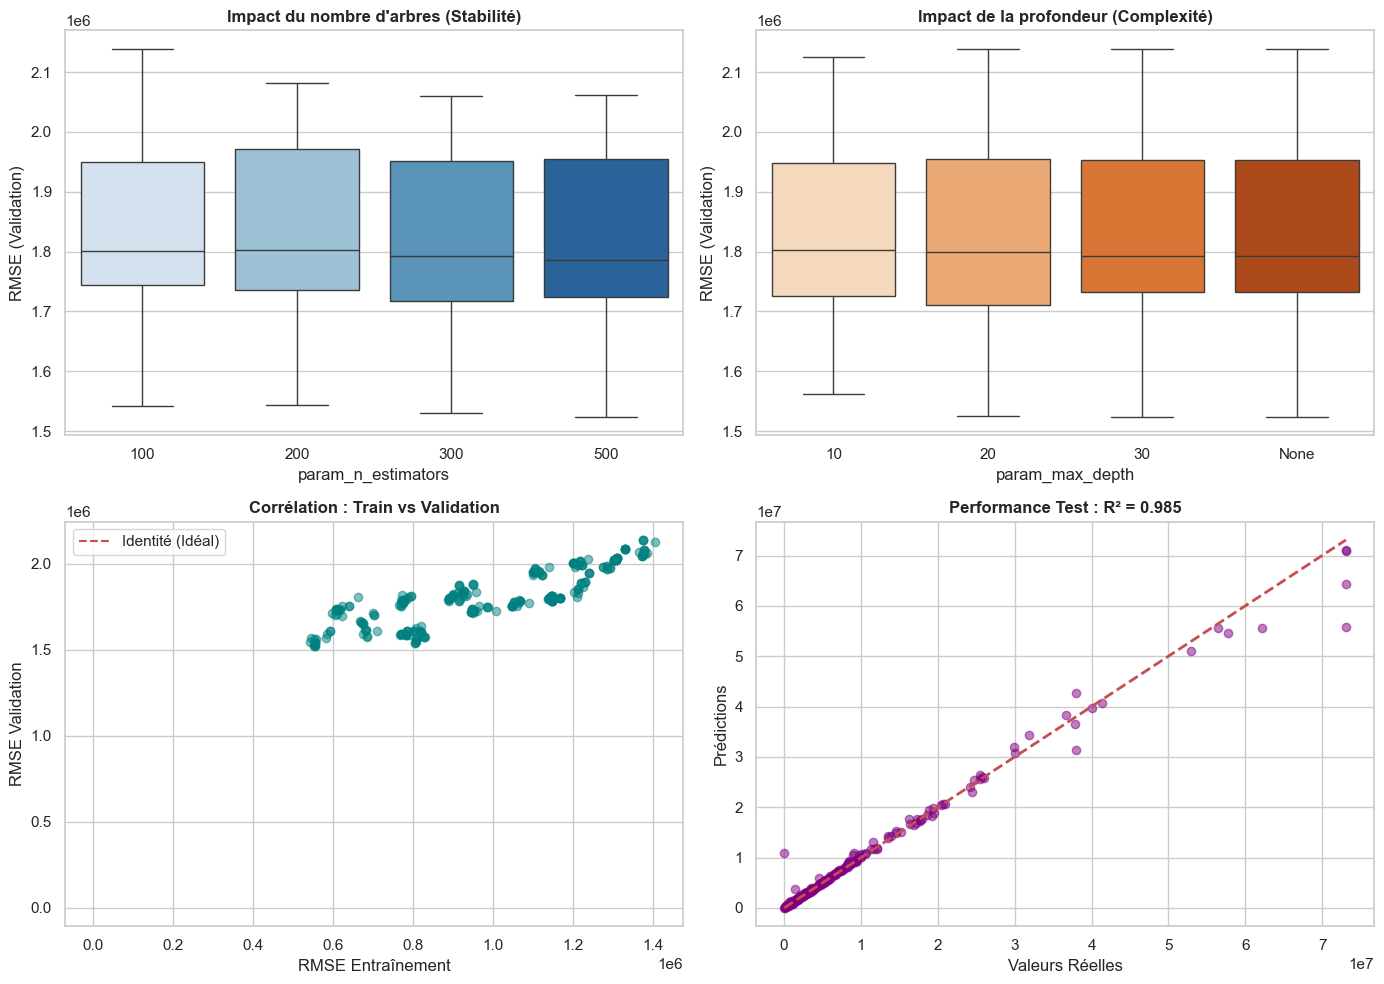


✅ GRAPHIQUES GÉNÉRÉS AVEC SUCCÈS (Type None géré): 'analyse_grid_search_seattle.png' 



In [53]:
# --- Bibliothèques de visualisation ---
import matplotlib.pyplot as plt                # Interface graphique de base
import seaborn           as sns                # Visualisation statistique
import numpy             as np                 # Calculs numériques

# ##############################################################################
# ÉTAPE 4.15 : DASHBOARD DE DIAGNOSTIC (VERSION CORRIGÉE)
# ##############################################################################

# Préparation des données pour éviter l'erreur de type (None vs Int)
# ------------------------------------------------------------------------------
# On crée une copie pour ne pas altérer les résultats originaux
plot_df = resultats_df.copy()

# Conversion des types 'Object' (contenant None) en String pour le tri graphique
plot_df['param_max_depth'] = plot_df['param_max_depth'].astype(str)
plot_df['param_n_estimators'] = plot_df['param_n_estimators'].astype(str)

# Configuration de la figure
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Étude de la stabilité : Impact du nombre d'arbres
# ------------------------------------------------------------------------------
sns.boxplot(
    data    = plot_df, 
    x       = 'param_n_estimators', 
    y       = 'rmse_mean',
    ax      = axes[0, 0],
    palette = 'Blues'
)
axes[0, 0].set_title("Impact du nombre d'arbres (Stabilité)", fontweight='bold')
axes[0, 0].set_ylabel("RMSE (Validation)")

# 2. Étude du Biais : Impact de la profondeur (CORRIGÉ)
# ------------------------------------------------------------------------------
sns.boxplot(
    data    = plot_df, 
    x       = 'param_max_depth', 
    y       = 'rmse_mean',
    ax      = axes[0, 1],
    palette = 'Oranges'
)
axes[0, 1].set_title("Impact de la profondeur (Complexité)", fontweight='bold')
axes[0, 1].set_ylabel("RMSE (Validation)")

# 3. Diagnostic de Généralisation : Corrélation Train vs Validation
# ------------------------------------------------------------------------------
rmse_train_all = np.sqrt(-plot_df['mean_train_score'])
rmse_val_all   = plot_df['rmse_mean']

axes[1, 0].scatter(rmse_train_all, rmse_val_all, alpha=0.5, color='teal')
axes[1, 0].plot([0, 500], [0, 500], 'r--', label='Identité (Idéal)')
axes[1, 0].set_xlabel("RMSE Entraînement")
axes[1, 0].set_ylabel("RMSE Validation")
axes[1, 0].set_title("Corrélation : Train vs Validation", fontweight='bold')
axes[1, 0].legend()

# 4. Inférence Finale : Prédictions vs Réalité
# ------------------------------------------------------------------------------
axes[1, 1].scatter(y_test_global, y_pred, alpha=0.5, color='purple')
axes[1, 1].plot([y_test_global.min(), y_test_global.max()], 
                [y_test_global.min(), y_test_global.max()], 
                'r--', lw=2)
axes[1, 1].set_xlabel("Valeurs Réelles")
axes[1, 1].set_ylabel("Prédictions")
axes[1, 1].set_title(f"Performance Test : R² = {r2:.3f}", fontweight='bold')

plt.tight_layout()
plt.savefig('analyse_grid_search_seattle.png', dpi=300) # Export haute résolution
plt.show()

print("\n========================================================================")
print(f"✅ GRAPHIQUES GÉNÉRÉS AVEC SUCCÈS (Type None géré): 'analyse_grid_search_seattle.png' ")
print("========================================================================\n")

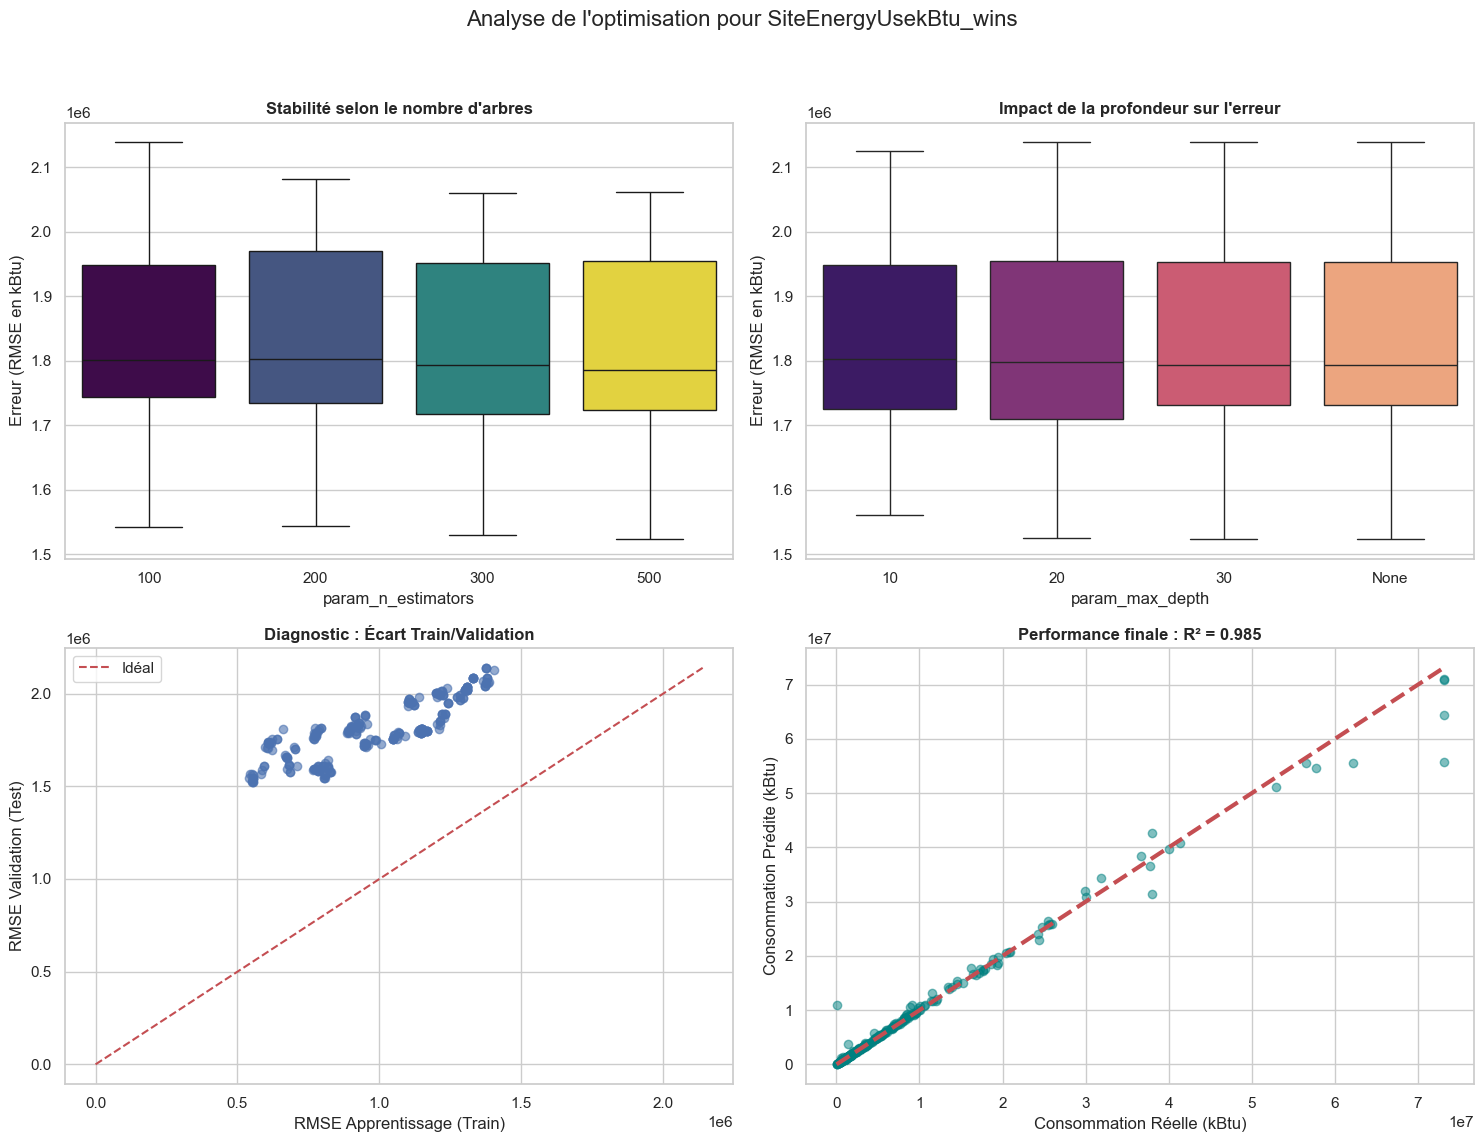


✅ DASHBOARD GÉNÉRÉ : 'analyse_optimisation_seattle.png'



In [54]:
# --- Bibliothèques de visualisation ---
import matplotlib.pyplot as plt                # Interface graphique de base
import seaborn           as sns                # Visualisation statistique
import numpy             as np                 # Calculs numériques

# ##############################################################################
# DASHBOARD DE DIAGNOSTIC - OPTIMISATION DU MODÈLE SEATTLE
# ##############################################################################

# ------------------------------------------------------------------------------
# 1. Préparation des données pour les graphiques
# ------------------------------------------------------------------------------
plot_df = resultats_df.copy()                  # Copie pour isolation

# Conversion des scores négatifs de scikit-learn en RMSE (positif)
plot_df['rmse_val']   = np.sqrt(-plot_df['mean_test_score'])
plot_df['rmse_train'] = np.sqrt(-plot_df['mean_train_score'])

# Nettoyage des valeurs nulles pour max_depth (None -> Illimité)
plot_df['param_max_depth'] = plot_df['param_max_depth'].fillna('None')

# ------------------------------------------------------------------------------
# 2. Configuration et tracé du Dashboard
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 2.1 Stabilité : Impact du nombre d'arbres (n_estimators)
# ------------------------------------------------------------------------------
sns.boxplot(
    data    = plot_df, 
    x       = 'param_n_estimators', 
    y       = 'rmse_val', 
    hue     = 'param_n_estimators', 
    legend  = False, 
    ax      = axes[0, 0], 
    palette = "viridis"
)
axes[0, 0].set_title("Stabilité selon le nombre d'arbres", fontweight='bold')
axes[0, 0].set_ylabel("Erreur (RMSE en kBtu)")

# 2.2 Complexité : Impact de la profondeur (max_depth)
# ------------------------------------------------------------------------------
sns.boxplot(
    data    = plot_df, 
    x       = 'param_max_depth', 
    y       = 'rmse_val', 
    hue     = 'param_max_depth', 
    legend  = False, 
    ax      = axes[0, 1], 
    palette = "magma"
)
axes[0, 1].set_title("Impact de la profondeur sur l'erreur", fontweight='bold')
axes[0, 1].set_ylabel("Erreur (RMSE en kBtu)")

# 2.3 Diagnostic : Corrélation Train vs Validation (Écart de généralisation)
# ------------------------------------------------------------------------------
max_val_diag = max(plot_df['rmse_train'].max(), plot_df['rmse_val'].max())
axes[1, 0].scatter(plot_df['rmse_train'], plot_df['rmse_val'], alpha=0.6)
axes[1, 0].plot([0, max_val_diag], [0, max_val_diag], 'r--', label="Idéal")
axes[1, 0].set_title("Diagnostic : Écart Train/Validation", fontweight='bold')
axes[1, 0].set_xlabel("RMSE Apprentissage (Train)")
axes[1, 0].set_ylabel("RMSE Validation (Test)")
axes[1, 0].legend()

# 2.4 Inférence : Prédictions vs Réalité (Performance sur données inconnues)
# ------------------------------------------------------------------------------
axes[1, 1].scatter(y_test_global, y_pred, alpha=0.5, color='teal')
lims_final = [min(y_test_global.min(), y_pred.min()), 
              max(y_test_global.max(), y_pred.max())]
axes[1, 1].plot(lims_final, lims_final, 'r--', lw=3)
axes[1, 1].set_title(f"Performance finale : R² = {r2:.3f}", fontweight='bold')
axes[1, 1].set_xlabel("Consommation Réelle (kBtu)")
axes[1, 1].set_ylabel("Consommation Prédite (kBtu)")

# ------------------------------------------------------------------------------
# 3. Finalisation et exportation
# ------------------------------------------------------------------------------
plt.suptitle(f"Analyse de l'optimisation pour {FEATURE_TARGET}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('analyse_optimisation_seattle.png', dpi=300)
plt.show()

print("\n========================================================================")
print(f"✅ DASHBOARD GÉNÉRÉ : 'analyse_optimisation_seattle.png'")
print("========================================================================\n")

#### 5.3.3. EXTRACTION DE L'IMPORTANCE DES VARIABLES (FEATURE IMPORTANCE)

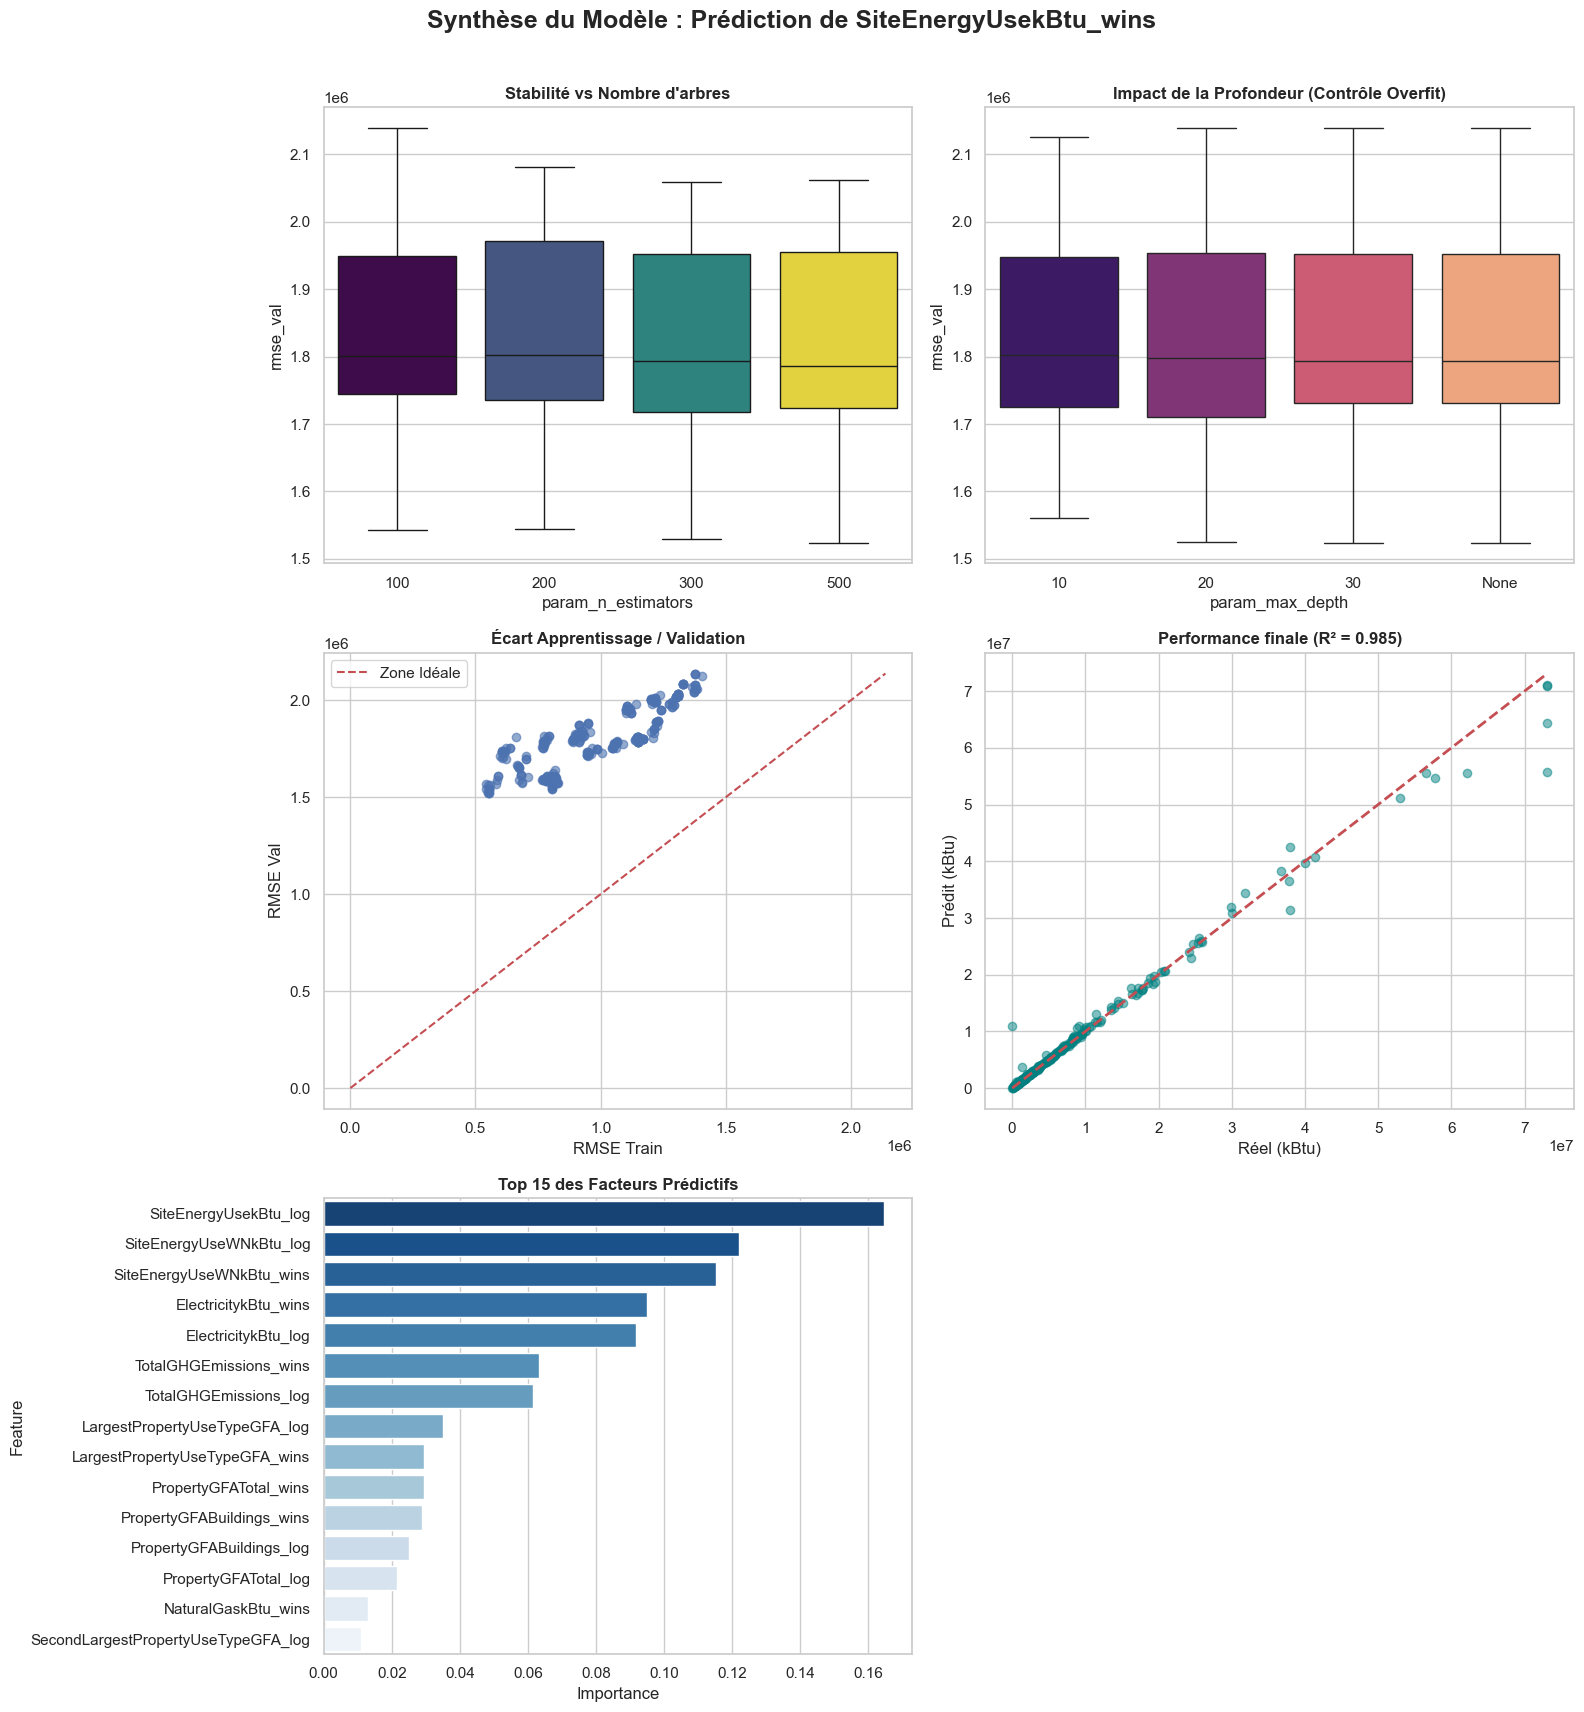


✅ DASHBOARD DE SYNTHÈSE GÉNÉRÉ AVEC SUCCÈS



In [55]:
# --- Bibliothèques de visualisation ---
import matplotlib.pyplot as plt                # Interface graphique
import seaborn           as sns                # Visualisation statistique
import numpy             as np                 # Calculs numériques
import pandas            as pd                 # Manipulation de données

# ##############################################################################
# SYNTHÈSE GLOBALE - PERFORMANCE ET EXPLICABILITÉ
# ##############################################################################

# 1. Préparation des métriques et extraction de l'importance
# ------------------------------------------------------------------------------
# Calcul des RMSE pour l'analyse de généralisation
resultats_df['rmse_val']   = np.sqrt(-resultats_df['mean_test_score'])
resultats_df['rmse_train'] = np.sqrt(-resultats_df['mean_train_score'])
resultats_df['param_max_depth'] = resultats_df['param_max_depth'].fillna('None')

# Extraction du champion pour l'analyse des variables
best_rf     = grid_complet.best_estimator_
importances = pd.DataFrame({
    'Feature'    : X_train_global.columns,
    'Importance' : best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

# 2. Configuration du Dashboard (3 lignes x 2 colonnes)
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# --- A. Diagnostic de l'Optimisation (Hyperparamètres) ---
sns.boxplot(data=resultats_df, x='param_n_estimators', y='rmse_val', 
            hue='param_n_estimators', legend=False, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Stabilité vs Nombre d'arbres", fontweight='bold')

sns.boxplot(data=resultats_df, x='param_max_depth', y='rmse_val', 
            hue='param_max_depth', legend=False, ax=axes[0, 1], palette="magma")
axes[0, 1].set_title("Impact de la Profondeur (Contrôle Overfit)", fontweight='bold')

# --- B. Diagnostic d'Overfitting (Le "Diagnostic de Hinton") ---
max_err = max(resultats_df['rmse_train'].max(), resultats_df['rmse_val'].max())
axes[1, 0].scatter(resultats_df['rmse_train'], resultats_df['rmse_val'], alpha=0.6)
axes[1, 0].plot([0, max_err], [0, max_err], 'r--', label="Zone Idéale")
axes[1, 0].set_title("Écart Apprentissage / Validation", fontweight='bold')
axes[1, 0].set_xlabel("RMSE Train"); axes[1, 0].set_ylabel("RMSE Val")
axes[1, 0].legend()

# --- C. Confrontation Réel vs Prédit (Validation Finale) ---
axes[1, 1].scatter(y_test_global, y_pred, alpha=0.5, color='teal')
lims = [min(y_test_global.min(), y_pred.min()), max(y_test_global.max(), y_pred.max())]
axes[1, 1].plot(lims, lims, 'r--', lw=2)
axes[1, 1].set_title(f"Performance finale (R² = {r2:.3f})", fontweight='bold')
axes[1, 1].set_xlabel("Réel (kBtu)"); axes[1, 1].set_ylabel("Prédit (kBtu)")

# --- D. Feature Importance (L'explicabilité selon Bengio) ---
sns.barplot(data=importances, x='Importance', y='Feature', ax=axes[2, 0], palette="Blues_r")
axes[2, 0].set_title("Top 15 des Facteurs Prédictifs", fontweight='bold')

# Nettoyage de l'espace vide
fig.delaxes(axes[2, 1])

# 3. Finalisation visuelle
# ------------------------------------------------------------------------------
plt.suptitle(f"Synthèse du Modèle : Prédiction de {FEATURE_TARGET}", 
             fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

print("\n========================================================================")
print(f"✅ DASHBOARD DE SYNTHÈSE GÉNÉRÉ AVEC SUCCÈS")
print("========================================================================\n")